# CS5242 Project

In [2]:
import os
len(os.listdir('cs5242_project_data/pdbs/'))
os.listdir('cs5242_project_data/pdbs/')

['1O4J.pdb',
 '2CJF.pdb',
 '1QIN.pdb',
 '2QWE.pdb',
 '1H0S.pdb',
 '2JC6.pdb',
 '1QK0.pdb',
 '2ZFP.pdb',
 '1HFC.pdb',
 '2ZDX.pdb',
 '1AOE.pdb',
 '5AQG.pdb',
 '1ZZ2.pdb',
 '4NDA.pdb',
 '2QUM.pdb',
 '2ZK6.pdb',
 '3GAM.pdb',
 '1XOG.pdb',
 '1MTB.pdb',
 '1FGH.pdb',
 '2OQV.pdb',
 '2HVC.pdb',
 '2CGV.pdb',
 '3L03.pdb',
 '2FLB.pdb',
 '1SJW.pdb',
 '2Q92.pdb',
 '1M6W.pdb',
 '1M66.pdb',
 '1QPL.pdb',
 '3GWW.pdb',
 '1DIA.pdb',
 '1T8I.pdb',
 '1JF7.pdb',
 '2QN1.pdb',
 '1XVE.pdb',
 '1C6X.pdb',
 '2OHT.pdb',
 '4KOU.pdb',
 '5DZ2.pdb',
 '4B05.pdb',
 '1JJB.pdb',
 '1C4G.pdb',
 '1ZOE.pdb',
 '1MMW.pdb',
 '1OVH.pdb',
 '2QC6.pdb',
 '3B1N.pdb',
 '1C5T.pdb',
 '2VD4.pdb',
 '1JIN.pdb',
 '3E6L.pdb',
 '1T4J.pdb',
 '2QBS.pdb',
 '1ML2.pdb',
 '4ZAU.pdb',
 '1L3L.pdb',
 '3TL5.pdb',
 '3CN0.pdb',
 '4AWO.pdb',
 '2W8F.pdb',
 '2BU2.pdb',
 '2UW7.pdb',
 '1K4Y.pdb',
 '1LGT.pdb',
 '2GJ4.pdb',
 '2IIV.pdb',
 '1U1F.pdb',
 '1PY5.pdb',
 '1PZO.pdb',
 '2W6M.pdb',
 '2GG3.pdb',
 '1R4L.pdb',
 '3S3M.pdb',
 '1GYY.pdb',
 '2BXT.pdb',
 '2NMX.pdb',

In [2]:
import pandas as pd
import numpy as np
import sys
import os
from collections import Counter
import torch
from torch import nn
import random
pd.options.mode.chained_assignment = None


sys.path.append('./cs5242_project_data/Project_test_grading/student_submission/ID1_NAME1_Submission')
from model import Model

from utilities_student_1 import *

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
pdb_dict = {}
for file_name in os.listdir('cs5242_project_data/pdbs/'):
# for file_name in os.listdir('cs5242_project_data/test_folder/'):
    if len(sys.argv) < 2:
        perror_and_exit("Usage: {} PDB_FILE_PATH".format(sys.argv[0]), 1)

    # pdb_path = sys.argv[1]
    pdb_path='cs5242_project_data/pdbs/'
#     pdb_path='cs5242_project_data/test_folder/'    
    pdb_path = pdb_path+file_name
    # pdb_path='1BKY.pdb'
    if not os.path.exists(pdb_path):
        perror_and_exit("Error: file does not exist", 2)

    if not os.path.isfile(pdb_path):
        perror_and_exit("Error: {} is not a file".format(pdb_path), 3)

    print("Reading protein file {}...".format(os.path.abspath(pdb_path)))
    try:
        X_list, Y_list, Z_list, atomtype_list,aminoacid_list,aminoacidname_list=read_pdb(pdb_path)
        pdb_dict[file_name.split(".")[0]] = {"X_list":X_list, "Y_list":Y_list,"Z_list":Z_list,\
                                             "atomtype_list":atomtype_list,"aminoacid_list":aminoacid_list,\
                                            'aminoacidname_list':aminoacidname_list}    
    except:
        print("An exception occurred")

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1O4J.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2CJF.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1QIN.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2QWE.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1H0S.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2JC6.pdb...
An exception occurred
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Pro

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/4QD3.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1KUV.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2NVD.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3F3T.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3ZUO.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1NHX.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1X6N.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2J7Y.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1O7P.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2ZDN.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1QHI.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2ZFS.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1NDY.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3DP3.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1BSJ.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3TT0.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/5PRC.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1IA2.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1ZOG.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1OWY.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1D1X.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3E68.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2OJI.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3BET.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1CBQ.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3EAI.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1S38.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3R4X.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2OHR.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2F6W.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2I0Y.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2BVX.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1E9A.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1WRR.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1LFW.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1UKE.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1V7A.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1Q1G.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1TYU.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2VIW.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1DID.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1M7A.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1NG3.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3C4F.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1UF7.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3DDP.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1LKD.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1ECQ.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2Z7G.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2OZR.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1O2I.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/6CSC.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1O3M.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3EQ7.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1BWB.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2PW0.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3FMZ.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1UYS.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2IWS.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2RBE.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1SXG.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2AXT.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3BYZ.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1SZO.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2C66.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3BZ7.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3U5K.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1ORW.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2V5A.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2VCQ.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2ONC.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2OM9.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3HAC.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3QM4.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3H6W.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2GA2.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3S7S.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1EF9.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1XH0.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1Q65.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3G1O.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2D3Z.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1JVI.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/9NSE.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1G0N.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1NNK.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1BZC.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1YOU.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1IJR.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3DZ6.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1OHJ.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/4PD7.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2OUZ.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3G30.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1MQJ.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1ZRK.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1R3N.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1LO8.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3DCV.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/5I9I.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3D5F.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2G72.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2PAX.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1BBP.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2PCP.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1U4M.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1KJR.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1IQM.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/5AYF.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3NN7.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2OVX.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2CCT.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2D3B.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2VX0.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1N8U.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2R64.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2BFY.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1PHA.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2PVJ.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/4F9C.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1FLS.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/6STD.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3N7H.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1SUI.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/5T8F.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3GK1.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1YNK.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1WCC.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1UY9.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2IWX.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/5UDA.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1G2K.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3EQ8.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1X39.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/4W9X.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2VU1.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2VWX.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1O2Q.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1N7J.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2E9P.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2BGM.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1W7H.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1WAX.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3HMM.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2CCS.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1Q6K.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1ZS0.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2DE4.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2C69.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1CSS.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2W0B.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1E00.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2IMF.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3CGF.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1EFA.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2WEI.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3FTU.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3FU0.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/6PRC.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1KDG.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2WHO.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1KE5.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1HDU.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2VQJ.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1O92.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2ORS.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1QGL.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1V7Z.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2RG5.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2RDN.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1G4K.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2RGU.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2B4B.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3F2N.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1O4B.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2ZEC.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1FH9.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2QU3.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1AL7.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1TW2.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2W6P.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2UZL.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3D14.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1U3S.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/4MO8.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2GFK.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2QOH.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3EMG.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3L08.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2F9B.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2VIN.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1M79.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2A2G.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2VG7.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2VDM.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1C72.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1T4R.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3E6T.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1R78.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3DEI.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2IKG.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3DGA.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1U3W.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3VZB.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1A6V.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2HVX.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1ZW9.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2ZI2.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2ZJH.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/5JMY.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1I53.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/3VN2.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1Y2J.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1YEI.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1NDW.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/2EI7.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1O4P.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1TTM.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/4IAQ.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1HDQ.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1O4G.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Project/cs5242_project_data/pdbs/1MZS.pdb...
Reading protein file /Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/CS5242/Pr

## Creating Protein DF

In [4]:
main_protein_df = process_PDB("x","x",pdb_dict)


In [5]:
main_protein_df.head()

X       Y       Z  hydrophobic  polar   PID  ALA  ARG  ASN  ASP  CYS  GLN  GLU  GLY  HIS  ILE  LEU  LYS  PHE  PRO  SER  THR  TRP  TYR  VAL  MET  DA  DC  DG  DT  DU   A   C   G   U  UNK
1  3.271  14.781   5.265            3      3  1O4J  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN
2  4.175  17.075   7.466            6      2  1O4J  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN
3  2.916  19.336   8.256            5      4  1O4J  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN
4  0.377  18.587   8.674            3      2  1O4J  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN
5  0.386  17.400  11.033            5      4  1O4J  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN

## Load the other Files

In [6]:
#load centroids
path = os.getcwd()
centroids = pd.read_csv(path+"/cs5242_project_data/centroids.csv")
print(centroids.head())

#load pairs
pairs = pd.read_csv(path+"/cs5242_project_data/pair.csv")
print(pairs.head())

    PID          x          y          z
0  102D   9.819391  24.178348  71.561739
1  110M  35.189667   6.802667  12.175667
2  112M  34.892200   7.174000  12.498400
3  11BA -14.688256  14.944487   0.193744
4  11BG   5.319879  55.114576  66.171818
    PID   LID
0  102D   494
1  110M  1797
2  112M   732
3  11BA  1313
4  11BG  2537


In [7]:
# Make fake PID pairings for negative data
import random
pd.options.mode.chained_assignment = None

pairs["wrong_PID"] = 0
for i in range(len(pairs)):
    correct_PID = pairs['PID'].iloc[i]
    PID_list= list(pairs['PID'])[:]
    PID_list.remove(correct_PID)
    wrong_PID = random.choice(PID_list)
    pairs["wrong_PID"].iloc[i]=wrong_PID
pairs

PID   LID wrong_PID
0     102D   494      3DPD
1     110M  1797      2WCA
2     112M   732      1N7J
3     11BA  1313      1HT5
4     11BG  2537      3DL9
...    ...   ...       ...
2995  3GS0  2035      1JHA
2996  3GS4   333      1XNN
2997  3GS7  2892      2AA2
2998  3GSM   834      1CLE
2999  3GT3  1694      1T9A

[3000 rows x 3 columns]

In [8]:
#checking no 'correct' PID for negative data
pairs[pairs['wrong_PID']==pairs["PID"]]

Empty DataFrame
Columns: [PID, LID, wrong_PID]
Index: []

## Creating Ligand DF

In [9]:
path = os.getcwd()
ligands = pd.read_csv(path+"/cs5242_project_data/ligand.csv",index_col="LID")
# ligands.head()

df = pd.merge(pd.merge(pairs,centroids),ligands,on="LID")
# df.head()

#Label encode the list of characters in each ligand
def smiles_encoder(smiles):
    CHAR_SMI_SET = {"(": 1, ".": 2, "0": 3, "2": 4, "4": 5, "6": 6, "8": 7, "@": 8,
                "B": 9, "D": 10, "F": 11, "H": 12, "L": 13, "N": 14, "P": 15, "R": 16,
                "T": 17, "V": 18, "Z": 19, "\\": 20, "b": 21, "d": 22, "f": 23, "h": 24,
                "l": 25, "n": 26, "r": 27, "t": 28, "#": 29, "%": 30, ")": 31, "+": 32,
                "-": 33, "/": 34, "1": 35, "3": 36, "5": 37, "7": 38, "9": 39, "=": 40,
                "A": 41, "C": 42, "E": 43, "G": 44, "I": 45, "K": 46, "M": 47, "O": 48,
                "S": 49, "U": 50, "W": 51, "Y": 52, "[": 53, "]": 54, "a": 55, "c": 56,
                "e": 57, "g": 58, "i": 59, "m": 60, "o": 61, "s": 62, "u": 63, "y": 64, "p":65}
    length = len(smiles)
    X = np.zeros(length, dtype=int)
    for i, ch in enumerate(smiles[:length]):
        X[i] = CHAR_SMI_SET[ch] - 1
    return(X)

df["Encoded_Smiles"]=df['Smiles'].map(lambda x: smiles_encoder(x))
df.drop(['Smiles'],axis=1,inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

# Count # of character types in Smile string

from collections import Counter
lst=[]
for row in df["Encoded_Smiles"]:
    lst.append(Counter(row))

ohe_smiles_count = pd.DataFrame(lst)
df_merge = pd.merge(left=df, right=ohe_smiles_count,right_index=True,left_index=True)

#Ligands df
df_merge

PID   LID wrong_PID          x          y          z                                     Encoded_Smiles    55   34     0    30    41   39   13    47   25    52   11    53     7   14    3  48   33  60  10  44   19   35  24  50   4  36  46  57   1  56   5  61    8   26  17  62  20  28  16  58  40   32  15  18  64  31
0     102D   494      3DPD   9.819391  24.178348  71.561739  [55, 34, 0, 55, 55, 55, 0, 55, 55, 34, 30, 41,...  12.0  4.0   5.0   5.0   5.0  2.0  4.0   2.0  NaN   NaN  NaN   NaN   NaN  NaN  NaN NaN  NaN NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN NaN
1     110M  1797      2WCA  35.189667   6.802667  12.175667                                   [41, 39, 13, 41]   NaN  NaN   NaN   NaN   2.0  1.0  1.0   NaN  NaN   NaN  NaN   NaN   NaN  NaN  NaN NaN  NaN NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN NaN
2     112M   732      1N7J  34.892200   7.174000  12.498400                           [41, 39, 13, 41, 41, 41]   NaN  NaN   NaN   NaN   4.0  1.0  1.0   NaN  NaN   NaN  NaN   NaN   NaN  NaN  NaN NaN  NaN NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN NaN
3     11BA  1313      1HT5 -14.688256  14.944487   0.193744  [25, 34, 0, 55, 0, 39, 47, 30, 52, 25, 11, 53,...   9.0  8.0  10.0  10.0  10.0  3.0  1.0  12.0  6.0  10.0  9.0  10.0  13.0  1.0  2.0 NaN  NaN NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN NaN
4     11BG  2537      3DL9   5.319879  55.114576  66.171818  [25, 34, 55, 0, 13, 30, 52, 25, 11, 53, 55, 3,...   5.0  6.0   9.0   9.0  10.0  2.0  2.0  11.0  4.0  10.0  9.0  10.0  12.0  1.0  2.0 NaN  NaN NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN NaN
...    ...   ...       ...        ...        ...        ...                                                ...   ...  ...   ...   ...   ...  ...  ...   ...  ...   ...  ...   ...   ...  ...  ...  ..  ...  ..  ..  ..  ...  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..
2990  3GS0  2035      1JHA  21.835619  43.358381   5.922905  [55, 34, 3, 55, 55, 55, 55, 55, 34, 32, 55, 34...  12.0  4.0   2.0   2.0   5.0  2.0  1.0   3.0  NaN   1.0  1.0   1.0   1.0  NaN  2.0 NaN  NaN NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN  1.0 NaN NaN NaN NaN
2991  3GS4   333      1XNN  21.921150  43.452400   5.793400  [55, 34, 3, 39, 41, 0, 41, 35, 39, 41, 41, 39,...   6.0  2.0   2.0   2.0  10.0  5.0  1.0   3.0  NaN   NaN  NaN   NaN   NaN  NaN  2.0 NaN  NaN NaN NaN NaN  NaN  2.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN NaN
2992  3GS7  2892      2AA2  21.058688  42.161750   6.279813  [41, 47, 55, 34, 55, 55, 55, 55, 55, 34, 33, 4...   6.0  2.0   1.0   1.0   5.0  2.0  1.0   4.0  NaN   NaN  NaN   NaN   NaN  NaN  NaN NaN  1.0 NaN NaN NaN  1.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN NaN
2993  3GSM   834      1CLE  -3.797056  16.102389  11.830556  [41, 41, 41, 41, 41, 0, 39, 47, 30, 13, 52, 41...   NaN  2.0   4.0   4.0  11.0  3.0  2.0   5.0  NaN   4.0  4.0   4.0   7.0  NaN  NaN NaN  NaN NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN NaN
2994  3GT3  1694      1T9A  20.712563  38.108125  11.434938  [41, 0, 39, 47, 30, 0, 55, 34, 55, 0, 55, 0, 1...   6.0  2.0   7.0   7.0   2.0  2.0  1.0   4.0  NaN   NaN  NaN   NaN   NaN  NaN  NaN NaN  NaN NaN NaN NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  3.0  3.0 NaN NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN NaN

[2995 rows x 53 columns]

## Merging two DF's: Ligand DF + Protein DF

In [14]:
final_df = df_merge.merge(main_protein_df,how='left',on='PID')
# final_df.info()
final_df.drop('Encoded_Smiles',axis=1,inplace=True)
final_df.fillna(0,inplace=True)
# final_df["label"]=1
final_df.drop(['wrong_PID'],axis=1,inplace=True)
final_df.head()

#Splitting final_df into a list of df's per protein-LID pair, and zero pad length of each df to the average length of each protein (500)

positive_df_list=[]
desired_length=500
# for k,v in test_df.groupby(['PID','LID']):
for k,v in final_df.groupby(['PID','LID']):
#     print(len(v))
    if len(v)== desired_length:
        positive_df_list.append(v)
        continue
    elif len(v)>desired_length:
        v = v[:desired_length]
    else:
        d = pd.DataFrame(0, index=np.arange(desired_length-len(v)), columns=v.columns)
        v = pd.concat([v,d])
        v.reset_index(drop=True,inplace=True)
    positive_df_list.append(v)
    
#Convert to a list of arrays, and drop 'PID', 'LID' columns
positive_array_list = []
for df in positive_df_list:
    df.drop(['PID','LID'],axis=1,inplace=True)
    positive_array_list.append(df.to_numpy())
positive_array = np.stack(positive_array_list, axis=0)
positive_array.shape

#Separately create the Labels array for positive dataset
positive_labels=np.ones((len(positive_df_list),))
positive_labels.shape
#Put both Positive Data and Positive Labels into a tuple
positive_array.shape
positive_data=(positive_array,positive_labels)
print(positive_data[0].shape)
print(positive_data[1].shape)


(2995, 500, 84)
(2995,)


## Deciding target length of each protein file

<AxesSubplot:ylabel='Frequency'>

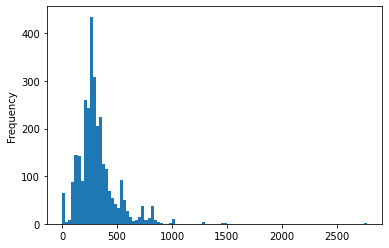

In [15]:
#Visualizing how big each protein is (in terms of # of Amino acid's), so can decide optimal length to set each protein array.
#Most fall under length of 500
final_df.groupby(['PID','LID']).size().sort_values(ascending=False).head(100)
final_df.groupby(['PID','LID']).size().mean()
final_df.groupby(['PID','LID']).size().plot.hist(bins=100)


In [16]:
print("Min: ",final_df.groupby(['PID','LID']).size().min())
print("Max: ", final_df.groupby(['PID','LID']).size().max())
print("Mean: ", final_df.groupby(['PID','LID']).size().mean())

Min:  1
Max:  2774
Mean:  315.34991652754593


## Creating negative training data

In [17]:
#Creating 'wrong' data
final_wrong_df = df_merge.merge(main_protein_df,how='left',left_on='wrong_PID',right_on="PID")
# final_df[final_df['PID'] =='1QK0']
final_wrong_df.drop('Encoded_Smiles',axis=1,inplace=True)
# final_wrong_df["label"]=0
final_wrong_df.fillna(0,inplace=True)
final_wrong_df.drop(['PID_x','PID_y'],axis=1,inplace=True)
final_wrong_df.rename(columns={'wrong_PID':'PID'},inplace=True)
final_wrong_df.head()

negative_df_list=[]
desired_length=desired_length
# for k,v in test_df.groupby(['PID','LID']):
for k,v in final_wrong_df.groupby(['PID','LID']):
#     print(len(v))
    if len(v)== desired_length:
        negative_df_list.append(v)
        continue
    elif len(v)>desired_length:
        v = v[:desired_length]
    else:
        d = pd.DataFrame(0, index=np.arange(desired_length-len(v)), columns=v.columns)
        v = pd.concat([v,d])
        v.reset_index(drop=True,inplace=True)
    negative_df_list.append(v)
len(negative_df_list)

#Convert to a list of arrays, and drop 'PID', 'LID' columns
negative_array_list = []
for df in negative_df_list:
    df.drop(['PID','LID'],axis=1,inplace=True)
    negative_array_list.append(df.to_numpy())
negative_array = np.stack(negative_array_list, axis=0)
negative_array.shape

#Separately create array for negative labels
negative_labels=np.zeros((len(negative_df_list),))
negative_labels.shape

# Create tuple containing negative data and negative labels
negative_data=(negative_array,negative_labels)

print(negative_data[0].shape)
print(negative_data[1].shape)

(2995, 500, 84)
(2995,)


In [18]:
# Sense check length of proteins
# len(final_wrong_df[(final_wrong_df['wrong_PID']=='1GCZ') & (final_wrong_df['LID']==1694)])

#Check column ordering is the same
pos_df_columns = list(final_df.columns)
neg_df_columns = list(final_wrong_df.columns)
# print(pd.DataFrame(list(zip(pos_df_columns,neg_df_columns))))
pos_df_columns[2:] == neg_df_columns[2:]

final_wrong_df.tail()
len(final_wrong_df)

949595

## Merging Positive and Negative Arrays into 1 Array

In [19]:
complete_array = np.concatenate((positive_array, negative_array), axis=0)
complete_label = np.concatenate((positive_labels, negative_labels), axis=0)

In [20]:
print("complete_array.shape: ", complete_array.shape)
print("complete_labels.shape: ", complete_label.shape)

complete_array.shape:  (5990, 500, 84)
complete_labels.shape:  (5990,)


## Preparing Data for Model Input

In [24]:
# Converting input arrays into tensors, normalizing data, and splitting into train/test splits with 20% test size.

import torch
complete_array.shape
complete_label.shape

train_data = torch.from_numpy(complete_array)
train_labels = torch.from_numpy(complete_label)
train_data = train_data.float()
train_labels=train_labels.long()

print(train_data.shape)
print(train_labels.shape)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.20, random_state=42)

# Standardizing data

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train = torch.from_numpy(scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape))
# x_test = torch.from_numpy(scaler.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([5990, 500, 84])
torch.Size([5990])
torch.Size([4792, 500, 84])
torch.Size([1198, 500, 84])
torch.Size([4792])
torch.Size([1198])


In [ ]:
x_train[0]

# CNN Model

In [72]:
# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [96]:
x_train.shape

torch.Size([4792, 500, 84])

In [111]:
x_train.shape
x_test.shape
x_train = x_train.reshape(4792, 1, 500, 84)
x_train.shape
x_train.shape, y_train.shape
x_test = x_test.reshape(1198, 1, 500, 84)
x_test.shape, y_test.shape

(torch.Size([4792, 1, 500, 84]), torch.Size([4792]))

(torch.Size([1198, 1, 500, 84]), torch.Size([1198]))

In [100]:
class Net(nn.Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
#             Linear(4 * 7 * 7, 10)
            Linear(10500, 2)            
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [101]:
# defining the model
model2 = Net()
# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.07)
# defining the loss function
criterion = CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
print(model2)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=10500, out_features=2, bias=True)
  )
)


In [118]:
x_train, y_train = Variable(x_train), Variable(y_train)
type(x_train[0])

if torch.cuda.is_available():
    print('yes')

In [134]:
def train(epoch):
    model2.train()
    tr_loss = 0
    # getting the training set
    x_train1, y_train1 = Variable(x_train), Variable(y_train)
    # getting the validation set
    x_test1, y_test1 = Variable(x_test), Variable(y_test)
    # converting the data into GPU format
#     if torch.cuda.is_available():
#         x_train = x_train.cuda()
#         y_train = y_train.cuda()
#         x_test = x_test.cuda()
#         y_test = y_test.cuda()

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(x_train1)
    output_val = model(x_test1)

    # computing the training and validation loss
    loss_train = criterion(output_train, y_train1)
    loss_val = criterion(output_val, y_test1)
    train_losses.append(loss_train)
    val_losses.append(loss_val)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    if epoch%2 == 0:
        # printing the validation loss
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

In [135]:
# defining the number of epochs
n_epochs = 25
# empty list to store training losses
train_losses = []
# empty list to store validation losses
val_losses = []
# training the model
for epoch in range(n_epochs):
    train(epoch)

Epoch :  1 	 loss : tensor(0.6917, grad_fn=<NllLossBackward0>)
Epoch :  3 	 loss : tensor(0.6924, grad_fn=<NllLossBackward0>)
Epoch :  5 	 loss : tensor(0.6920, grad_fn=<NllLossBackward0>)
Epoch :  7 	 loss : tensor(0.6915, grad_fn=<NllLossBackward0>)
Epoch :  9 	 loss : tensor(0.6922, grad_fn=<NllLossBackward0>)
Epoch :  11 	 loss : tensor(0.6923, grad_fn=<NllLossBackward0>)
Epoch :  13 	 loss : tensor(0.6918, grad_fn=<NllLossBackward0>)
Epoch :  15 	 loss : tensor(0.6920, grad_fn=<NllLossBackward0>)
Epoch :  17 	 loss : tensor(0.6922, grad_fn=<NllLossBackward0>)
Epoch :  19 	 loss : tensor(0.6918, grad_fn=<NllLossBackward0>)
Epoch :  21 	 loss : tensor(0.6919, grad_fn=<NllLossBackward0>)
Epoch :  23 	 loss : tensor(0.6921, grad_fn=<NllLossBackward0>)
Epoch :  25 	 loss : tensor(0.6918, grad_fn=<NllLossBackward0>)


In [136]:
train_losses

[tensor(0.6916, grad_fn=<NllLossBackward0>),
 tensor(0.6917, grad_fn=<NllLossBackward0>),
 tensor(0.6919, grad_fn=<NllLossBackward0>),
 tensor(0.6919, grad_fn=<NllLossBackward0>),
 tensor(0.6919, grad_fn=<NllLossBackward0>),
 tensor(0.6919, grad_fn=<NllLossBackward0>),
 tensor(0.6919, grad_fn=<NllLossBackward0>),
 tensor(0.6918, grad_fn=<NllLossBackward0>),
 tensor(0.6919, grad_fn=<NllLossBackward0>),
 tensor(0.6919, grad_fn=<NllLossBackward0>),
 tensor(0.6919, grad_fn=<NllLossBackward0>),
 tensor(0.6918, grad_fn=<NllLossBackward0>),
 tensor(0.6919, grad_fn=<NllLossBackward0>),
 tensor(0.6919, grad_fn=<NllLossBackward0>),
 tensor(0.6919, grad_fn=<NllLossBackward0>),
 tensor(0.6919, grad_fn=<NllLossBackward0>),
 tensor(0.6919, grad_fn=<NllLossBackward0>),
 tensor(0.6919, grad_fn=<NllLossBackward0>),
 tensor(0.6919, grad_fn=<NllLossBackward0>),
 tensor(0.6919, grad_fn=<NllLossBackward0>),
 tensor(0.6918, grad_fn=<NllLossBackward0>),
 tensor(0.6918, grad_fn=<NllLossBackward0>),
 tensor(0.

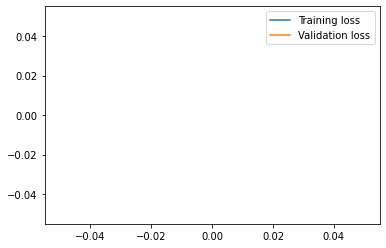

In [137]:
train_losses = []
for i in train_losses:
#     print(i.detach().numpy())
    train_losses.append(i.detach().numpy())
    
val_losses = []
for i in val_losses:
    val_losses.append(i.detach().numpy())


# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()
    

In [128]:
x_train2.shape

torch.Size([4792, 1, 500, 84])

In [131]:
# prediction for training set
with torch.no_grad():
    output = model2(x_train)
    
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on training set
accuracy_score(y_train, predictions)

0.5002086811352254

In [132]:
# prediction for validation set
with torch.no_grad():
    output = model(x_test2)

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on validation set
accuracy_score(y_test, predictions)

0.5183639398998331

## CNN Model 2

In [37]:
x_train = x_train.reshape(4792, 1, 500, 84)
x_train.shape

x_test = x_test.reshape(1198, 1, 500, 84)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([4792, 1, 500, 84]),
 torch.Size([4792]),
 torch.Size([1198, 1, 500, 84]),
 torch.Size([1198]))

In [ ]:
#Screenshot purpose
class CNN(nn.Module):
    def __init__(self, num_classes=2,device='cpu'):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)        
        self.aap = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten =  nn.Flatten(start_dim=1, end_dim=-1)
        self.fc = nn.Linear(32, num_classes)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.bn1(self.relu(self.conv1(x)))
        x = self.bn1(self.relu(self.conv2(x)))
        x = self.maxpool(x)
        x = self.bn2(self.relu(self.conv3(x)))
        x = self.bn2(self.relu(self.conv4(x)))
        x = self.aap(x)        
        x = self.flatten(x)
        out = self.fc(x)         
        return out
    
    def inference(self, PID, PDBS_DIR, centroid, ligands):
        r"""
        Your own model should have this 'inference' function, which does all necessary data pre-processing and the forward computation of your NN model. 
        We will call this function to run your model and grade its performance. Please note that the input to this funciton is strictly defined as follows:
        Args:
            PID: str, one single protein ID, e.g., '112M'. You should use this ID to query the corresponding PDB file and process it.
            PDBS_DIR: str, the PDF directory from which to read PDB files.
            centroid: float tuple, the x-y-z binding location of protein PID, e.g., (34.8922, 7.174, 12.4984).
            ligands: str list, a list of SIMLEs formulas of ligands, e.g., ['NCCCCCCNCCCCCCN', 'C1CC1(N)P(=O)(O)O']
        Return:
            A Torch Tensor in the shape of (len(ligands), 1), representing the predicted binding score (or likelihood) for protein PID and each ligand.
        
        About GPU:
            Again, you do not need a GPU to train your model. However, We might use GPU to accelerate our grading work. 
            So please send all your pre-processed inputs to self.device.
            If you define any object that is not a torch.nn module, you should also explicitly send this object to self.device.
        """
        full_path = PDBS_DIR+'/'+PID+'.pdb'

        pdb_dict = {}
        try:
            # print(full_path)
            X_list, Y_list, Z_list, atomtype_list,aminoacid_list,aminoacidname_list=read_pdb(full_path)
            pdb_dict[PID] = {"X_list":X_list, "Y_list":Y_list,"Z_list":Z_list,\
                                                "atomtype_list":atomtype_list,"aminoacid_list":aminoacid_list,\
                                                'aminoacidname_list':aminoacidname_list}    
        except:
            print("An exception occurred")
        # print(pdb_dict.keys())

        # full_path = PDBS_DIR+'/'+PID+'.pdb'
        print(PID)
        ligand_df_merge = batch_process_SMILE(ligands,centroid,PID)
        # print(ligand_df_merge.head())
        main_protein_df = process_PDB(PID,PDBS_DIR,pdb_dict)
        # print(main_protein_df.head())
        test_data = combine_df(main_protein_df,ligand_df_merge)
        
#         print(test_data)
#         print(test_data.shape)
        
#         print(self.forward(test_data.float())[:,1].reshape((-1,1)).shape)
        test_data = test_data.reshape(-1, 1, 500, 84)
    
        return self.forward(test_data.float())[:,1].reshape((-1,1))


    

In [32]:
# Creating a CNN model
class Model(nn.Module):

    def __init__(self, num_classes=2,device='cpu'):
        super(Model, self).__init__()
        self.device = device
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
#         self.conv5 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
#         self.conv6 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
#         self.conv7 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
#         self.conv8 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        self.bn4 = nn.BatchNorm2d(128)
        
        self.aap = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten =  nn.Flatten(start_dim=1, end_dim=-1)
        self.fc = nn.Linear(32, num_classes)
        
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.bn1(self.relu(self.conv1(x)))
        x = self.bn1(self.relu(self.conv2(x)))
        x = self.maxpool(x)
        x = self.bn2(self.relu(self.conv3(x)))
        x = self.bn2(self.relu(self.conv4(x)))
#         x = self.maxpool(x)
#         x = self.bn3(self.relu(self.conv5(x)))
#         x = self.bn3(self.relu(self.conv6(x)))
#         x = self.maxpool(x)
#         x = self.bn4(self.relu(self.conv7(x)))
#         x = self.bn4(self.relu(self.conv8(x)))
        x = self.aap(x)        
        x = self.flatten(x)
        out = self.fc(x)         
        return out
    
    def inference(self, PID, PDBS_DIR, centroid, ligands):
        r"""
        Your own model should have this 'inference' function, which does all necessary data pre-processing and the forward computation of your NN model. 
        We will call this function to run your model and grade its performance. Please note that the input to this funciton is strictly defined as follows:
        Args:
            PID: str, one single protein ID, e.g., '112M'. You should use this ID to query the corresponding PDB file and process it.
            PDBS_DIR: str, the PDF directory from which to read PDB files.
            centroid: float tuple, the x-y-z binding location of protein PID, e.g., (34.8922, 7.174, 12.4984).
            ligands: str list, a list of SIMLEs formulas of ligands, e.g., ['NCCCCCCNCCCCCCN', 'C1CC1(N)P(=O)(O)O']
        Return:
            A Torch Tensor in the shape of (len(ligands), 1), representing the predicted binding score (or likelihood) for protein PID and each ligand.
        
        About GPU:
            Again, you do not need a GPU to train your model. However, We might use GPU to accelerate our grading work. 
            So please send all your pre-processed inputs to self.device.
            If you define any object that is not a torch.nn module, you should also explicitly send this object to self.device.
        """
        full_path = PDBS_DIR+'/'+PID+'.pdb'

        pdb_dict = {}
        try:
            # print(full_path)
            X_list, Y_list, Z_list, atomtype_list,aminoacid_list,aminoacidname_list=read_pdb(full_path)
            pdb_dict[PID] = {"X_list":X_list, "Y_list":Y_list,"Z_list":Z_list,\
                                                "atomtype_list":atomtype_list,"aminoacid_list":aminoacid_list,\
                                                'aminoacidname_list':aminoacidname_list}    
        except:
            print("An exception occurred")
        # print(pdb_dict.keys())

        # full_path = PDBS_DIR+'/'+PID+'.pdb'
        print(PID)
        ligand_df_merge = batch_process_SMILE(ligands,centroid,PID)
        # print(ligand_df_merge.head())
        main_protein_df = process_PDB(PID,PDBS_DIR,pdb_dict)
        # print(main_protein_df.head())
        test_data = combine_df(main_protein_df,ligand_df_merge)
        
#         print(test_data)
#         print(test_data.shape)
        
#         print(self.forward(test_data.float())[:,1].reshape((-1,1)).shape)
        test_data = test_data.reshape(-1, 1, 500, 84)
        test_data = test_data.to(self.device)
        with torch.no_grad():
            output = self.forward(test_data.float())[:,1].reshape((-1,1))

        return output


    

In [17]:
!pip3 install torchvision

In [38]:
import torchvision.transforms as transforms
# num_epoch = 1
batch_size = 512

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = list(zip(x_train, y_train))
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=10)

testset = list(zip(x_test,y_test))
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=10)

# classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [20]:
# trainset = list(zip(x_train, y_train))
# trainset[0][0].shape

(tensor([[[ 9.6559, 39.4819, 67.8121,  ...,  0.0000,  0.0000,  0.0000],
          [ 9.6559, 39.4819, 67.8121,  ...,  0.0000,  0.0000,  0.0000],
          [ 9.6559, 39.4819, 67.8121,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]]),
 tensor(0))

In [35]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
model3 = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr=0.33)


In [159]:
blah_trainloader = [([1,2,3,4],1),([2,3,4,5],2),([3,4,5,6],3)]

for i, data in enumerate(blah_trainloader, 0):
    print(data[1])


1
2
3


In [49]:
data = [[1,2,3,4],[1,2,3,4],[1,2,5,3]]
labels = [1,2,3,4]
trainset2 = list(zip(data,labels))

# trainset = list(zip(x_train, y_train))

for i, data in enumerate(trainloader, 0):
    print(data[1][0])

AttributeError: 'list' object has no attribute 'item'

In [64]:
num_epoch = 1
batch_size = 512

for epoch in range(num_epoch):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        outputs = model3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        print("batch # ", i, ": train loss: ", loss.item())

        running_loss += loss.item()
        if (i + 1) % 128 == 0:
            print('epoch {:3d} | {:5d} batches loss: {:.4f}'.format(epoch, i + 1, running_loss/128))
            running_loss = 0.0

print('Finished Training')

/opt/homebrew/lib/python3.9/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


batch #  0 : train loss:  0.6970992088317871
batch #  1 : train loss:  0.6923900246620178
batch #  2 : train loss:  0.6925422549247742
batch #  3 : train loss:  0.6947554349899292
batch #  4 : train loss:  0.6934921145439148
batch #  5 : train loss:  0.6927714347839355
batch #  6 : train loss:  0.6952900886535645
batch #  7 : train loss:  0.6928989887237549
batch #  8 : train loss:  0.6928732991218567
batch #  9 : train loss:  0.6920092701911926
Finished Training


In [185]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [150]:
correct = 0
total = 0
total_predicted = []
total_labels = []
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = model3(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        total_predicted.append(predicted)
        total_labels.append(labels)

print(f'Accuracy of the network on the test samples: {100 * correct // total} %')

/opt/homebrew/lib/python3.9/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Accuracy of the network on the test samples: 49 %


In [151]:
# _, predicted = torch.max(outputs.data, 1)

# predicted, labels
# torch.cat((predicted,labels))

predicted = torch.cat(total_predicted)
labels = torch.cat(total_labels)


In [152]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(labels, predicted)
print(cf_matrix)


[[202 381]
 [226 389]]


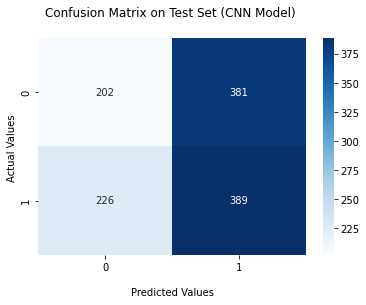

In [153]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt=".0f")
ax.set_title('Confusion Matrix on Test Set (CNN Model) \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt.show()

In [48]:
model3.forward(test_data)

tensor([[-0.1105, -0.1347]], grad_fn=<AddmmBackward0>)

In [154]:
torch.save(model3.state_dict(), 'parameters2.pt')

In [50]:
model3.load_state_dict(torch.load('parameters2.pt'))
model3.eval()
for name, param in model3.named_parameters():
    print('param: ',param)

param:  Parameter containing:
tensor([[[[-0.1492, -0.0694, -0.0860],
          [-0.1275, -0.0831,  0.2194],
          [ 0.2421,  0.1178,  0.1891]]],


        [[[-0.0293,  0.0760, -0.2140],
          [ 0.1170, -0.1873,  0.0805],
          [ 0.1284, -0.0612,  0.3039]]],


        [[[ 0.0387, -0.2452,  0.1231],
          [-0.0146,  0.1050,  0.1468],
          [-0.2626,  0.1224, -0.3141]]],


        [[[-0.3031, -0.0719,  0.0011],
          [-0.1263,  0.1945, -0.1715],
          [ 0.1532, -0.0880, -0.2169]]],


        [[[ 0.3230,  0.0902,  0.0983],
          [ 0.1227, -0.0923, -0.2818],
          [-0.1033, -0.1924, -0.1011]]],


        [[[-0.1780,  0.2256, -0.1964],
          [-0.1715, -0.1333, -0.1581],
          [ 0.0920,  0.0905, -0.1892]]],


        [[[ 0.1454,  0.0584,  0.3272],
          [ 0.2481, -0.1726, -0.2728],
          [-0.2887, -0.2872,  0.2936]]],


        [[[ 0.0352,  0.3278,  0.3116],
          [ 0.0364,  0.3172,  0.0226],
          [-0.2967, -0.0365,  0.0698]]],


  

In [51]:
PID = '102D'
PDBS_DIR = './cs5242_project_data/pdbs'
centroid=(9.819391304,24.17834783,71.56173913)
ligands=['C1CC1(N)P(=O)(O)O','(N)(N)P(=O)(O)O','(=O)(O)O(N)',
         'S(=O)(=O)(N)c1ccc(cc1)C(=O)NCCOCCOCCNC(=O)[C@@H](N)Cc1ccccc1',
        'c1(ccc(cc1)C(=N)N)OCCCOc1ccc(cc1)C(=N)N','c1(ccc(cc1)C(=N)N)']

model3.inference(PID, PDBS_DIR, centroid, ligands)

102D


tensor([[-0.2040],
        [-0.2041],
        [-0.2040],
        [-0.2042],
        [-0.2041],
        [-0.2041]], grad_fn=<ReshapeAliasBackward0>)

In [37]:
for data_prt, data_lig, data_bind, target in loader:
            
            data_prt, data_lig, data_bind = data_prt.cuda(), data_lig.cuda(), data_bind.cuda()
            
            with torch.no_grad():
                output = self.forward(data_prt.float(), data_lig.float(), data_bind.float())

NameError: name 'loader' is not defined

In [ ]:
"test"

# Model

In [68]:
# Preparing data for model input
# Converting input arrays into tensors, normalizing data, and splitting into train/test splits with 20% test size.

import torch
complete_array.shape
complete_label.shape

train_data = torch.from_numpy(complete_array)
train_labels = torch.from_numpy(complete_label)
train_data = train_data.float()
train_labels=train_labels.long()

print(train_data.shape)
print(train_labels.shape)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.20, random_state=42)

# Standardizing data

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train = torch.from_numpy(scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape))
# x_test = torch.from_numpy(scaler.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([5990, 500, 84])
torch.Size([5990])
torch.Size([4792, 500, 84])
torch.Size([1198, 500, 84])
torch.Size([4792])
torch.Size([1198])


In [144]:
import sys
import torch
from torch import nn
import torch.nn as nn
import torch.optim as optim
from utilities_student_1 import *
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import DataLoader, Dataset
from torch.nn import Parameter
from tqdm import tqdm

# print(SubModule(100))
# print(pd.DataFrame([1,2,3,4]))

class Model(nn.Module):
    r"""
    This is a dummy model just for illustrtation. Your own model should have an 'inference' function as defined below. 
    The 'inference' function should do all necessary data pre-processing and the forward computation of your NN model. 
    When grading, we will call this 'inference' function of your own model.
    You do not need a GPU to train your model. When grading, however, we might use a GPU to make a faster work.
    """
    def __init__(self, input_size=500*84, hidden_size=10,device='cpu'):
        super(Model, self).__init__()
        self.device = device
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        
        self.fc2 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        
        self.relu = torch.nn.ReLU()
#         self.fc3 = torch.nn.Linear(self.hidden_size, 1)
        self.fc3 = torch.nn.Linear(self.hidden_size, 2)
#         self.sigmoid = torch.nn.Sigmoid()
#         self.batch_norm = torch.nn.functional.batch_norm()

    def forward(self, x):
#         print('x shape is ',x.shape)
        x = x.to(self.device)
#         x = x.view(-1,desired_length*84)        
        x = x.reshape(-1,desired_length*84)
#             x = x.view(-1,desired_length*20)
        hidden = self.relu(self.fc1(x))
        hidden = self.relu(self.fc2(hidden))
        hidden = self.relu(self.fc2(hidden))
        output = self.fc3(hidden)
        
#         output = self.sigmoid(output)
        return output

    def inference(self, PID, PDBS_DIR, centroid, ligands):
        r"""
        Your own model should have this 'inference' function, which does all necessary data pre-processing and the forward computation of your NN model. 
        We will call this function to run your model and grade its performance. Please note that the input to this funciton is strictly defined as follows:
        Args:
            PID: str, one single protein ID, e.g., '112M'. You should use this ID to query the corresponding PDB file and process it.
            PDBS_DIR: str, the PDF directory from which to read PDB files.
            centroid: float tuple, the x-y-z binding location of protein PID, e.g., (34.8922, 7.174, 12.4984).
            ligands: str list, a list of SIMLEs formulas of ligands, e.g., ['NCCCCCCNCCCCCCN', 'C1CC1(N)P(=O)(O)O']
        Return:
            A Torch Tensor in the shape of (len(ligands), 1), representing the predicted binding score (or likelihood) for protein PID and each ligand.
        
        About GPU:
            Again, you do not need a GPU to train your model. However, We might use GPU to accelerate our grading work. 
            So please send all your pre-processed inputs to self.device.
            If you define any object that is not a torch.nn module, you should also explicitly send this object to self.device.
        """
        full_path = PDBS_DIR+'/'+PID+'.pdb'

        pdb_dict = {}
        try:
            # print(full_path)
            X_list, Y_list, Z_list, atomtype_list,aminoacid_list,aminoacidname_list=read_pdb(full_path)
            pdb_dict[PID] = {"X_list":X_list, "Y_list":Y_list,"Z_list":Z_list,\
                                                "atomtype_list":atomtype_list,"aminoacid_list":aminoacid_list,\
                                                'aminoacidname_list':aminoacidname_list}    
        except:
            print("An exception occurred")
        # print(pdb_dict.keys())

        # full_path = PDBS_DIR+'/'+PID+'.pdb'
        print(PID)
        ligand_df_merge = batch_process_SMILE(ligands,centroid,PID)
        # print(ligand_df_merge.head())
        main_protein_df = process_PDB(PID,PDBS_DIR,pdb_dict)
        # print(main_protein_df.head())
        test_data = combine_df(main_protein_df,ligand_df_merge)
        # print(test_data)
        print(self.forward(test_data.float())[:,1].reshape((-1,1)).shape)
        
        return self.forward(test_data.float())[:,1].reshape((-1,1))

# print('works')


In [ ]:
#for Screenshot

class MLP(nn.Module):
    def __init__(self, input_size=500*84, hidden_size=10,device='cpu'):
        super(Model, self).__init__()
        self.device = device
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)        
        self.fc2 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(self.hidden_size, 2)

    def forward(self, x):
        x = x.to(self.device)
        x = x.reshape(-1,500*84)
        hidden = self.relu(self.fc1(x))
        hidden = self.relu(self.fc2(hidden))
        hidden = self.relu(self.fc2(hidden))
        output = self.fc3(hidden)
        return output

    def inference(self, PID, PDBS_DIR, centroid, ligands):
        ligand_df_merge = batch_process_SMILE(ligands,centroid,PID)
        main_protein_df = process_PDB(PID,PDBS_DIR,pdb_dict)
        test_data = combine_df(main_protein_df,ligand_df_merge)
        return self.forward(test_data.float())[:,1].reshape((-1,1))

In [23]:
import matplotlib.pyplot as plt

NameError: name 'x_test' is not defined

In [ ]:
#for screenshot

optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
epoch = 50
criterion = torch.nn.CrossEntropyLoss()

# optimizer = optim.Adam(model.parameters(), lr=0.001)


In [145]:
# sys.path.append('./cs5242_project_data/Project_test_grading/student_submission/ID1_NAME1_Submission')
# from model import Model

model = Model(desired_length*84, 10)
# criterion = torch.nn.BCELoss()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# model.eval()
y_pred = model(x_test.float())
before_train = criterion(y_pred.squeeze(), y_test.long())
print('Test loss before training' , before_train.item())

model.train()
epoch = 50
loss_log=[]
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train.float())
#     during_train = criterion(y_pred.squeeze(), y_test.long())
#     print('Epoch {}: test loss during {}'.format(epoch, during_train.item()))
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train.long())
    
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()
    loss_log.append(loss.item())
    
model.eval()
y_pred = model(x_test.float())

after_train = criterion(y_pred.squeeze(), y_test.long()) 

print('Test loss after Training' , after_train.item())

Test loss before training 0.7128019332885742
Epoch 0: train loss: 0.7068179845809937
Epoch 1: train loss: 0.6936396360397339
Epoch 2: train loss: 0.686542272567749
Epoch 3: train loss: 0.6789552569389343
Epoch 4: train loss: 0.671389102935791
Epoch 5: train loss: 0.6625765562057495
Epoch 6: train loss: 0.6527823805809021
Epoch 7: train loss: 0.6458796262741089
Epoch 8: train loss: 0.6505704522132874
Epoch 9: train loss: 0.6766323447227478
Epoch 10: train loss: 0.6585471034049988
Epoch 11: train loss: 0.6297935247421265
Epoch 12: train loss: 0.607404887676239
Epoch 13: train loss: 0.6069260239601135
Epoch 14: train loss: 0.6073263883590698
Epoch 15: train loss: 0.638435959815979
Epoch 16: train loss: 0.5940587520599365
Epoch 17: train loss: 0.5760462880134583
Epoch 18: train loss: 0.5674595832824707
Epoch 19: train loss: 0.5604286789894104
Epoch 20: train loss: 0.5569275617599487
Epoch 21: train loss: 0.5531112551689148
Epoch 22: train loss: 0.5672706961631775
Epoch 23: train loss: 0.54

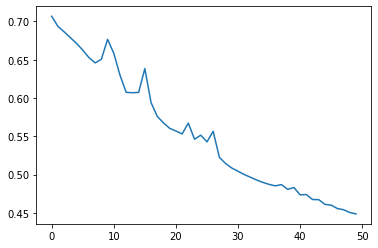

In [146]:
plt.plot(loss_log)
plt.show()

In [ ]:
# correct = 0
# total = 0
# with torch.no_grad():
#     for data in testloader:
#         inputs, labels = data[0].to(device), data[1].to(device)
#         outputs = model(inputs)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

# print(f'Accuracy of the network on the test samples: {100 * correct // total} %')

In [147]:
correct = 0
total = 0
outputs = model(x_test.float())
labels = y_test
_, predicted = torch.max(outputs.data, 1)
total += labels.size(0)
correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the test samples: {100 * correct // total} %')

Accuracy of the network on the test samples: 87 %


In [148]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(labels, predicted)
print(cf_matrix)


[[517  66]
 [ 79 536]]


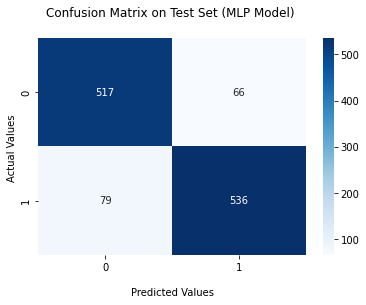

In [149]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt=".0f")
ax.set_title('Confusion Matrix on Test Set (MLP Model) \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt.show()

In [22]:
#Export parameters file
# torch.save(model.state_dict(), PATH)
torch.save(model.state_dict(), 'parameters.pt')

In [50]:
# Load Parameters file to test
desired_length=500
model = Model(desired_length*84, 10)

model.load_state_dict(torch.load('parameters.pt'))
model.eval()
for name, param in model.named_parameters():
    print('param: ',param.shape)

param:  torch.Size([10, 42000])
param:  torch.Size([10])
param:  torch.Size([10, 10])
param:  torch.Size([10])
param:  torch.Size([2, 10])
param:  torch.Size([2])


In [1]:
# # Helper Functions (utilities_student_1.py)

# # All needed libraries
# import pandas as pd
# import numpy as np
# from collections import Counter

# def batch_process_SMILE(ligands,centroid,PID):
#     # Making the Ligand DF
#         inf_df=pd.DataFrame(ligands,columns=['Smiles'])
#         inf_df['PID']=PID
#         inf_df['x']=centroid[0]
#         inf_df['y']=centroid[1]
#         inf_df['z']=centroid[2]
#         inf_df

#         # PandasTools.AddMoleculeColumnToFrame(inf_df,smilesCol= 'Smiles',molCol='ROMol')
#         # inf_df
#         def smiles_encoder(smiles):
#             CHAR_SMI_SET = {"(": 1, ".": 2, "0": 3, "2": 4, "4": 5, "6": 6, "8": 7, "@": 8,
#                         "B": 9, "D": 10, "F": 11, "H": 12, "L": 13, "N": 14, "P": 15, "R": 16,
#                         "T": 17, "V": 18, "Z": 19, "\\": 20, "b": 21, "d": 22, "f": 23, "h": 24,
#                         "l": 25, "n": 26, "r": 27, "t": 28, "#": 29, "%": 30, ")": 31, "+": 32,
#                         "-": 33, "/": 34, "1": 35, "3": 36, "5": 37, "7": 38, "9": 39, "=": 40,
#                         "A": 41, "C": 42, "E": 43, "G": 44, "I": 45, "K": 46, "M": 47, "O": 48,
#                         "S": 49, "U": 50, "W": 51, "Y": 52, "[": 53, "]": 54, "a": 55, "c": 56,
#                         "e": 57, "g": 58, "i": 59, "m": 60, "o": 61, "s": 62, "u": 63, "y": 64, "p":65}
#             length = len(smiles)
#             X = np.zeros(length, dtype=int)
#             for i, ch in enumerate(smiles[:length]):
#                 X[i] = CHAR_SMI_SET[ch] - 1
#             return(X)

#         # smiles_encoder('c1(ccc(cc1)C(=N)N)OCCCOc1ccc(cc1)C(=N)N')
#         inf_df["Encoded_Smiles"]=inf_df['Smiles'].map(lambda x: smiles_encoder(x))
#         inf_df.drop(['Smiles'],axis=1,inplace=True)
#         # inf_df.head()

#         inf_df.dropna(inplace=True)
#         inf_df.reset_index(inplace=True)
#         inf_df.drop('index',axis=1,inplace=True)

#         lst=[]
#         inf_df["LID"] = ''

#         # And creating a dummy LID just for reference        
#         for i,row in enumerate(inf_df["Encoded_Smiles"]):
#             lst.append(Counter(row))
#             inf_df['LID'].iloc[i]= i+1
#         ohe_smiles_count = pd.DataFrame(lst)
#         ligand_df_merge = pd.merge(left=inf_df, right=ohe_smiles_count,right_index=True,left_index=True)

#         return ligand_df_merge

    
# def process_PDB(PID,PDBS_DIR):
#     full_path = PDBS_DIR+'/'+PID+'.pdb'
    
#     def read_pdb(filename: str):
#         """Read a protein file to get four atom information lists.

#         You can copy this function to your project code.
#         """ 
#         with open(filename, 'r') as file:
#             strline_L = file.readlines()
#         strline_L=[strline.strip() for strline in strline_L]

#         X_list=[float(strline.split()[-3]) for strline in strline_L]
#         Y_list=[float(strline.split()[-2]) for strline in strline_L]
#         Z_list=[float(strline.split()[-1]) for strline in strline_L]
#         atomtype_list=[strline.split()[2][0] for strline in strline_L]
#     #     aminoacid_list=[strline.split()[5] for strline in strline_L]
#         aminoacid_list=[int(strline[22:26]) for strline in strline_L]
#         aminoacidname_list=[strline.split()[3] for strline in strline_L]

#         return X_list, Y_list, Z_list, atomtype_list, aminoacid_list,aminoacidname_list

#     def perror_and_exit(prompt: str, errno: int = -1):
#         print(prompt, file=sys.stderr)
#         sys.exit(errno)  
        

#     pdb_dict = {}
#     try:
#         X_list, Y_list, Z_list, atomtype_list,aminoacid_list,aminoacidname_list=read_pdb(full_path)
#         pdb_dict[PID] = {"X_list":X_list, "Y_list":Y_list,"Z_list":Z_list,\
#                                              "atomtype_list":atomtype_list,"aminoacid_list":aminoacid_list,\
#                                             'aminoacidname_list':aminoacidname_list}    
#     except:
#         print("An exception occurred")
#     pdb_dict[PID]['X_list']
#     new_pdb_dict = {}
#     for protein_name in pdb_dict.keys():
#         protein = pdb_dict[protein_name]
#         aminoacid={}
#         for i in range(len(protein["X_list"])):
#             acid = protein['aminoacid_list'][i]
#             atom = protein['atomtype_list'][i]
#             if acid in aminoacid.keys():
#                 if atom in ['N','O']:
#                     aminoacid[acid]['polar']+=1
#                 else:
#                     aminoacid[acid]['hydrophobic']+=1
#             else:  #first atom of amino acid
#                 aminoacid[acid] = {"amino_acid":protein["aminoacidname_list"][i]}
#                 aminoacid[acid]["X"] = protein["X_list"][i]
#                 aminoacid[acid]["Y"] = protein["Y_list"][i]
#                 aminoacid[acid]["Z"] = protein["Z_list"][i]
#                 aminoacid[acid]['hydrophobic']=0
#                 aminoacid[acid]['polar']=0
#                 if atom in ['N','O']:
#                     aminoacid[acid]['polar']+=1
#                 else:
#                     aminoacid[acid]['hydrophobic']+=1
#             aminoacid[acid]['PID'] = protein_name

#         new_pdb_dict[protein_name] = aminoacid

#     #One Hot Encode the 'amino_acid' column

#     main_protein_df = pd.DataFrame()
#     for protein_name in new_pdb_dict:
#         protein_df = pd.DataFrame.from_dict(new_pdb_dict[protein_name],orient ='index')

#         one_hot = pd.get_dummies(protein_df['amino_acid'])
#         protein_df = protein_df.drop('amino_acid',axis = 1)
#         # # Join the encoded df
#         protein_df = protein_df.join(one_hot)
#         main_protein_df = pd.concat([main_protein_df,protein_df],axis=0)
#         # protein_df.to_numpy()
#     return main_protein_df

# def combine_df(main_protein_df,ligand_df_merge):
#     final_df = ligand_df_merge.merge(main_protein_df,how='left',on='PID')
#     final_df.drop('Encoded_Smiles',axis=1,inplace=True)
#     final_df.fillna(0,inplace=True)

#     # Add all the columns present in Training data set, as they are not all present in test set. 
#     # And re-order to same column ordering for consistency
#     pos_df_columns = ['PID', 'LID', 'x', 'y', 'z', 55, 34, 0, 30, 41, 39, 13, 47, 25, 52, 11, 53, 7, 14, 3, 48, 33, 60, 10, 44, 19, 35, 24, 50, 4, 36, 46, 57, 1, 56, 5, 61, 8, 26, 17, 62, 20, 28, 16, 58, 40, 32, 15, 18, 64, 31, 'X', 'Y', 'Z', 'hydrophobic', 'polar', 'ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL', 'MET', 'DA', 'DC', 'DG', 'DT', 'DU', 'A', 'C', 'G', 'U', 'UNK']
#     for col in pos_df_columns:
#         if col not in final_df.columns:
#             final_df[col]=0
#     final_df = final_df[pos_df_columns]        

#      #Splitting final_df into a list of df's per protein-LID pair, and zero pad length of each df to the average length of each protein (500)

#     positive_df_list=[]
#     desired_length=500
#     for k,v in final_df.groupby(['PID','LID']):
#     #     print(len(v))
#         if len(v)== desired_length:
#             positive_df_list.append(v)
#             continue
#         elif len(v)>desired_length:
#             v = v[:desired_length]
#         else:
#             d = pd.DataFrame(0, index=np.arange(desired_length-len(v)), columns=v.columns)
#             v = pd.concat([v,d])
#             v.reset_index(drop=True,inplace=True)
#         positive_df_list.append(v)

#     #Convert to a list of arrays, and drop 'PID', 'LID' columns
#     positive_array_list = []
#     for df in positive_df_list:
#         df.drop(['PID','LID'],axis=1,inplace=True)
#         positive_array_list.append(df.to_numpy())
#     test_array = np.stack(positive_array_list, axis=0)
#     test_array.shape

#     # Converting input arrays into tensors, normalizing data, and splitting into train/test splits with 20% test size.

#     test_array.shape
#     test_data = torch.from_numpy(test_array)
#     return(test_data.float())

## Project Grading Script

In [27]:
# Project Grading Script

import os 
import sys
import torch
from torch import nn
import pandas as pd


CENTROIDS_DIR = './cs5242_project_data/Project_test_grading/project_test_data/centroids.csv'
PDBS_DIR = './cs5242_project_data/Project_test_grading/project_test_data/pdbs'
LIGAND_DIR = './cs5242_project_data/Project_test_grading/project_test_data/ligand.csv'
GT_PAIR_DIR = './cs5242_project_data/Project_test_grading/project_test_data/pair.csv'


#read centroids.csv
centroids = {}
df = pd.read_csv(CENTROIDS_DIR)
for i in range(len(df)):
    centroids[str(df.PID[i])] = (float(df.x[i]), float(df.y[i]), float(df.z[i]))
#centroids dict format: {'112M': (34.8922, 7.174, 12.4984), ...}


#read ligand.csv
ligands = {}    
df = pd.read_csv(LIGAND_DIR)
for i in range(len(df)):
    ligands[str(df.LID[i])] = (str(df.Smiles[i]))
#ligands dict format: {'3':'NCCCCCCNCCCCCCN', '3421':'C1CC1(N)P(=O)(O)O', ...}
LIDs =[LID for LID in ligands]
#LIDs format: ['3', '3421', ...], i.e., the key list of ligands dict.


#read groundtruth pair.csv for grading
gt_pairs = {}
df = pd.read_csv(GT_PAIR_DIR)
for i in range(len(df)):
    gt_pairs[str(df.PID[i])] = (str(df.LID[i]))
#gt_pairs dict format: {'112M': '3421', ...}


SUBMISSION_DIR = './cs5242_project_data/Project_test_grading/student_submission'
for folder in os.listdir(SUBMISSION_DIR):
    student_submission_folder = os.path.join(SUBMISSION_DIR, folder)

    sys.path.append(student_submission_folder)
    from model import Model

    MODEL_PATH = os.path.join(student_submission_folder, 'parameters.pt' )   #pre-trained parameters of your model
    BS = 100                        #Batch size for inference
    TOPK = 10                       #Set top-10 accuracy
    DEVICE = 'cpu'                  #You do not necessarily need a GPU. Of course, you are free to use a GPU if you have one.

    model = Model(device=DEVICE)    #When grading, we will import and call your own model
    #model.load_state_dict(torch.load(MODEL_PATH, map_location=torch.device('cpu')))
    model.to(DEVICE)
    model.eval()


    #inference
    prediction_correctness = []
    #traverse through all test proteins
    for PID in gt_pairs:
        binding_scores = torch.empty(0, 1)
        #traverse through all test ligands, covering BS ligands each time:
        for i in range(0, len(LIDs)-BS+1, BS):
            batch_pred = model.inference(PID, PDBS_DIR, centroids[PID], [ligands[LID] for LID in LIDs[i: i+BS]])
            binding_scores = torch.cat([binding_scores, batch_pred], dim=0)
        if i < len(LIDs)-BS:
            batch_pred = model.inference(PID, PDBS_DIR, centroids[PID], [ligands[LID] for LID in LIDs[i+BS: ]])
            binding_scores = torch.cat([binding_scores, batch_pred], dim=0)

        #transform torch.tensor to list
        binding_scores = binding_scores.squeeze(-1).cpu().detach().numpy().tolist()

        #get top-k scores and corresponding LIDs
        topk_pred = sorted(zip(binding_scores, LIDs), reverse=True)[: TOPK]
        topk_scores, topk_LIDs = zip(*topk_pred)
        #print(topk_LIDs)

        #compare with groundtruth
        if str(gt_pairs[PID]) in topk_LIDs:
            prediction_correctness.append(1)
        else:
            prediction_correctness.append(0)

    accuracy = sum(prediction_correctness) / len(prediction_correctness)

    print(f"Inference Prediction Score: {'{:.5f}'.format(accuracy)}.")

    sys.path.remove(student_submission_folder)
    del sys.modules['model']

torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([24, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([10

In [3]:
# Export parameters file
model.load_state_dict(torch.load('parameters.pt'))
model.eval()
for name, param in model.named_parameters():
    print('param: ',param.shape)

param:  torch.Size([10, 42000])
param:  torch.Size([10])
param:  torch.Size([10, 10])
param:  torch.Size([10])
param:  torch.Size([2, 10])
param:  torch.Size([2])


In [223]:
PID = '102D'
PDBS_DIR = './cs5242_project_data/pdbs'
centroid=(9.819391304,24.17834783,71.56173913)
ligands=['C1CC1(N)P(=O)(O)O','(N)(N)P(=O)(O)O','(=O)(O)O(N)',
         'S(=O)(=O)(N)c1ccc(cc1)C(=O)NCCOCCOCCNC(=O)[C@@H](N)Cc1ccccc1',
        'c1(ccc(cc1)C(=N)N)OCCCOc1ccc(cc1)C(=N)N','c1(ccc(cc1)C(=N)N)']


# model = Model(desired_length*84, 10)
model.inference(PID, PDBS_DIR, centroid, ligands).reshape((-1,1)).shape

102D
torch.Size([6, 1])


torch.Size([6, 1])

In [260]:
combined = np.vstack((trainset[0][0],trainset[1][0]))
combined.shape
combined=torch.tensor(combined)


torch.Size([2, 500, 84])

In [267]:
test_data = trainset[0][0].reshape(-1, 500, 84)
test_data = combined
test_data.shape
model.forward(test_data)

tensor([[  0.9548,  -6.2283],
        [-13.0389, -14.9824]], grad_fn=<AddmmBackward0>)

In [268]:
model.forward(test_data)[:,1].reshape((-1,1))

tensor([[ -6.2283],
        [-14.9824]], grad_fn=<ReshapeAliasBackward0>)

---

# Extra Research

## Smile -> Number Mapping from DeepDTAF

In [87]:
one_smile_string

'S(=O)(=O)(N)c1ccc(cc1)C(=O)NCCOCCOCCNC(=O)[C@@H](N)Cc1ccccc1'

In [79]:
CHAR_SMI_SET = {"(": 1, ".": 2, "0": 3, "2": 4, "4": 5, "6": 6, "8": 7, "@": 8,
                "B": 9, "D": 10, "F": 11, "H": 12, "L": 13, "N": 14, "P": 15, "R": 16,
                "T": 17, "V": 18, "Z": 19, "\\": 20, "b": 21, "d": 22, "f": 23, "h": 24,
                "l": 25, "n": 26, "r": 27, "t": 28, "#": 29, "%": 30, ")": 31, "+": 32,
                "-": 33, "/": 34, "1": 35, "3": 36, "5": 37, "7": 38, "9": 39, "=": 40,
                "A": 41, "C": 42, "E": 43, "G": 44, "I": 45, "K": 46, "M": 47, "O": 48,
                "S": 49, "U": 50, "W": 51, "Y": 52, "[": 53, "]": 54, "a": 55, "c": 56,
                "e": 57, "g": 58, "i": 59, "m": 60, "o": 61, "s": 62, "u": 63, "y": 64}


In [82]:
one_smile_string = ligands["Smiles"][1]
len(one_smile_string)

60

In [86]:
import numpy as np
X = np.zeros(60, dtype=np.int)
X
for i, ch in enumerate(one_smile_string[:60]):
    X[i] = CHAR_SMI_SET[ch] - 1
X

/var/folders/4_/d00l0kjx0d98bkwv29wwqzlm0000gn/T/ipykernel_8144/982101624.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros(60, dtype=np.int)


array([48,  0, 39, 47, 30,  0, 39, 47, 30,  0, 13, 30, 55, 34, 55, 55, 55,
        0, 55, 55, 34, 30, 41,  0, 39, 47, 30, 13, 41, 41, 47, 41, 41, 47,
       41, 41, 13, 41,  0, 39, 47, 30, 52, 41,  7,  7, 11, 53,  0, 13, 30,
       41, 55, 34, 55, 55, 55, 55, 55, 34])

In [ ]:
# importing one hot encoder 
from sklearn from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(data.Country.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["Country_"+str(int(i)) for i in range(data.shape[1])]) 
df = pd.concat([data, dfOneHot], axis=1)
#droping the country column 
df= df.drop(['Country'], axis=1) 
#printing to verify 
print(df.head())

## Ligands Data from RDKit

In [7]:
import os
import pandas as pd
# import rdkit
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit import DataStructs

In [8]:
path = os.getcwd()
ligands = pd.read_csv(path+"/cs5242_project_data/ligand.csv",index_col="LID")
ligands.head()

In [3]:
one_smile_string = ligands["Smiles"][1]
# one_smile_string = 'CCC(C)C(NC(=O)CNC(=O)C(CC1=CC=CC=C1)NC(=O)CNC(=O)C(CCC(N)=O)NC(=O)C(CC(C)C)NC(=O)C(C)NC(=O)C1CCCN1C(=O)C(C)NC(=O)C(C)NC(=O)C(CC1=CNC=N1)NC(=O)C(CC1=CC=C(O)C=C1)NC(=O)C(CCC(O)=O)NC(=O)C(CCCCN)NC(=O)C(CC(C)C)NC(=O)C(CCCCN)NC(=O)C(CCC(O)=O)NC(=O)C(NC(=O)C(CC(C)C)NC(=O)C(CC1=CNC=N1)NC(=O)C(N)CC1=CNC=N1)C(C)CC)C(=O)NC(CO)C(=O)NC(CO)C(=O)N1CCCC1C(=O)NC(CCC(O)=O)C(=O)NC(CCC(N)=O)C(=O)NC(C(C)C)C(=O)NC(CO)C(=O)NC(C)C(=O)NC(C)C(=O)NC(C(C)C)C(=O)NC(CCCNC(N)=N)C(=O)NC(C)C(=O)NCC(=O)NC(C)C(=O)NC(C)C(=O)NCC(=O)NC(C)C(=O)NC(C(C)CC)C(=O)NC(CO)C(=O)NCC(=O)NC(CO)C(=O)NC(C)C(=O)NC(C(C)CC)C(=O)NC(C(C)C)C(=O)NC(CCCCN)C(=O)NC(C(C)CC)C(=O)NC(C(C)CC)C(=O)NC(CCC(O)=O)C(=O)NC(CCCCN)C(=O)NC(CC(N)=O)C(=O)NC(CC(C)C)C(=O)NC(C)C(=O)NC(CO)C(=O)N1CCCC1C(=O)NC(CCCCN)C(=O)NC(CCC(N)=O)C(=O)NC(CCSC)C(=O)NC(CC(C)C)C(=O)NC(C)C(=O)NC(CCC(O)=O)C(=O)NC(CC(C)C)C(=O)NC(CCCNC(N)=N)C(=O)NC(CO)C(=O)NC(CC1=CC=CC=C1)C(=O)NC(C(C)C)C(=O)NC(CO)C(=O)NC(C)C(=O)NC(CCSC)C(=O)NC(CCCCN)C(=O)NC(C)C(=O)NC(C)C(=O)NC(CO)C(=O)NC(CCCNC(N)=N)C=O.CCC(C)C(NC(=O)CNC(=O)C1CCCN1C(=O)C(CC(O)=O)NC(=O)CNC(=O)C(CC(C)C)NC(=O)C(NC(=O)C(NC(=O)C(CC1=CC=CC=C1)NC(=O)C1CCCN1C(=O)C(NC(=O)C(CC1=CC=CC=C1)NC(=O)C(C)NC(=O)CNC(=O)C(CCC(O)=O)NC(=O)C(CCCNC(N)=N)NC(=O)C(CCCNC(N)=N)NC(=O)C(CC(O)=O)NC(=O)C(CC(N)=O)NC(=O)C(CC(C)C)NC(=O)C(CCC(N)=O)NC(=O)C(C)NC(=O)C(CC1=CC=CC=C1)NC(=O)C(CC(C)C)NC(=O)C(CC(N)=O)NC(=O)C(CCC(O)=O)NC(=O)C(CC1=CC=C(O)C=C1)NC(=O)C(CCCNC(N)=N)NC(=O)C(N)CCC(O)=O)C(C)C)C(C)C)C(C)O)C(=O)NC(CCC(O)=O)C(=O)NC(CCC(N)=O)C(=O)NC(CO)C(=O)NC(CC(C)C)C(=O)NC(CCCCN)C(=O)NC(C(C)CC)C(=O)NC(C(C)CC)C(=O)NC(CC(O)=O)C(=O)NC(C(C)O)C(=O)NC(CC(C)C)C(=O)NC(C(C)CC)C(=O)NC(CC(O)=O)C(=O)NC(C)C(=O)NCC(=O)NC(C)C(=O)NC(CC(O)=O)C(=O)NC(C)C(=O)NC(CC(C)C)C(=O)NC(CCC(O)=O)C(=O)NC(CC(C)C)C(=O)NCC(=O)NC(C(C)C)C(=O)N1CCCC1C(=O)NC(CC1=CC=CC=C1)C(=O)NC(CO)C(=O)NC(CC(O)=O)C(=O)N1CCCC1C(=O)NC(CC(C)C)C(=O)NC(C)C(=O)NC(CC(O)=O)C(=O)NCC(=O)N1CCCC1C(=O)NC(C(C)O)C(=O)NC(C(C)CC)C(=O)NC(CCC(N)=O)C(=O)NC(CC(N)=O)C(=O)NC(C)C(=O)NC(CC(N)=O)C(=O)NC(CC(C)C)C(=O)NC(CCCNC(N)=N)C(=O)NC(C)C(=O)NC(CC1=CC=CC=C1)C(=O)NC(C)C(=O)NC(C)C(=O)NCC(=O)NC(C(C)C)C(=O)NC(C(C)O)C(=O)N1CCCC1C(=O)NC(C)C(=O)NC(CCC(N)=O)C(=O)NC(CS)C(=O)NC(CC1=CC=CC=C1)C(=O)NC(CCC(O)=O)C(=O)NC(CCSC)C(=O)NC(CC(C)C)C(=O)NC(C)C(=O)NC(CC(C)C)C(=O)NC(C(C)CC)C(=O)NC(CCCNC(N)=N)C(=O)NC(CCC(O)=O)C(=O)NC(CCCCN)C(=O)NC(CC1=CNC=N1)C(=O)N1CCCC1C(=O)NC(C(C)O)C(=O)NC(C(C)CC)C(=O)N1CCCC1C(=O)NC(C(C)CC)C(=O)NCC(=O)NC(CC(C)C)C(=O)NC(CC(C)C)C(=O)NC(CCSC)C(=O)NC(CC1=CC=C(O)C=C1)C(=O)NC(C)C(=O)NC(CC(N)=O)C(=O)NC(CC(C)C)C(=O)NC(C(C)C)C(=O)NC(CC1=CC=CC=C1)C(=O)NC(CC(N)=O)C(=O)NC(CC(N)=O)C(=O)NCC(=O)NC(C(C)CC)C(=O)NC(CC(O)=O)C(=O)NC(C)C(=O)NC(CC1=CC=CC=C1)C(=O)NC(CC1=CC=C(O)C=C1)C(=O)NC(C)C(=O)NC(CCCNC(N)=N)C(=O)NC(CS)C(=O)NC(CCC(O)=O)C(=O)NC(CCC(N)=O)C(=O)NC(C(C)C)C(=O)NCC(=O)NC(C(C)C)C(=O)NC(CC(O)=O)C(=O)NC(CO)C(=O)NC(C(C)C)C(=O)NC(CC(C)C)C(=O)NC(C(C)C)C(=O)NC(C)C(=O)NC(CC(O)=O)C(=O)NC(C(C)C)C(=O)N1CCCC1C(=O)NC(C(C)C)C(=O)NC(CCC(O)=O)C(=O)NC(CCC(O)=O)C(=O)NC(CO)C(=O)NC(C)C(=O)N1CCCC1C(=O)NC(CC1=CC=CC=C1)C(=O)NC(CCCNC(N)=N)C(=O)NC(CCC(N)=O)C(=O)NC(C)C(=O)NC(C)C(=O)NC(CC(C)C)C(=O)NC(CCCNC(N)=N)C(=O)NC(CC1=CNC=N1)C(=O)NC(CC(N)=O)C(=O)NC(C(C)CC)C(=O)NC(C)C(=O)N1CCCC1C(=O)NC(C(C)CC)C(=O)NC(CC1=CC=CC=C1)C(=O)NC(C(C)CC)C(=O)NC(CS)C(=O)N1CCCC1C(=O)N1CCCC1C(=O)NC(CC(N)=O)C(=O)NC(C)C(=O)NC(CC(O)=O)C(=O)NC(CC(O)=O)C(=O)NC(CC(O)=O)C(=O)NC(CC(C)C)C(=O)NC(CC(C)C)C(=O)NC(CCCNC(N)=N)C(=O)NC(CCC(N)=O)C(=O)NC(C(C)C)C(=O)NC(C)C(=O)NC(CO)C(=O)NC(CC1=CC=C(O)C=C1)C(=O)NCC(=O)NC(CCCNC(N)=N)C(=O)NCC(=O)NC(CC1=CC=C(O)C=C1)C(=O)NC(C(C)O)C(=O)NC(CC1=CC=C(O)C=C1)C(=O)NC(CC(C)C)C(=O)NC(CC(C)C)C(=O)NC(CO)C(=O)NC(CCCNC(N)=N)C(=O)NC(CO)C(=O)NCC(=O)NC(C(C)C)C(=O)NC(C(C)O)C(=O)NCC(=O)NC(C)C(=O)NC(CCC(O)=O)C(=O)NC(CC(N)=O)C=O'
one_smile_string

'CCC(C)C(NC(=O)CNC(=O)C(CC1=CC=CC=C1)NC(=O)CNC(=O)C(CCC(N)=O)NC(=O)C(CC(C)C)NC(=O)C(C)NC(=O)C1CCCN1C(=O)C(C)NC(=O)C(C)NC(=O)C(CC1=CNC=N1)NC(=O)C(CC1=CC=C(O)C=C1)NC(=O)C(CCC(O)=O)NC(=O)C(CCCCN)NC(=O)C(CC(C)C)NC(=O)C(CCCCN)NC(=O)C(CCC(O)=O)NC(=O)C(NC(=O)C(CC(C)C)NC(=O)C(CC1=CNC=N1)NC(=O)C(N)CC1=CNC=N1)C(C)CC)C(=O)NC(CO)C(=O)NC(CO)C(=O)N1CCCC1C(=O)NC(CCC(O)=O)C(=O)NC(CCC(N)=O)C(=O)NC(C(C)C)C(=O)NC(CO)C(=O)NC(C)C(=O)NC(C)C(=O)NC(C(C)C)C(=O)NC(CCCNC(N)=N)C(=O)NC(C)C(=O)NCC(=O)NC(C)C(=O)NC(C)C(=O)NCC(=O)NC(C)C(=O)NC(C(C)CC)C(=O)NC(CO)C(=O)NCC(=O)NC(CO)C(=O)NC(C)C(=O)NC(C(C)CC)C(=O)NC(C(C)C)C(=O)NC(CCCCN)C(=O)NC(C(C)CC)C(=O)NC(C(C)CC)C(=O)NC(CCC(O)=O)C(=O)NC(CCCCN)C(=O)NC(CC(N)=O)C(=O)NC(CC(C)C)C(=O)NC(C)C(=O)NC(CO)C(=O)N1CCCC1C(=O)NC(CCCCN)C(=O)NC(CCC(N)=O)C(=O)NC(CCSC)C(=O)NC(CC(C)C)C(=O)NC(C)C(=O)NC(CCC(O)=O)C(=O)NC(CC(C)C)C(=O)NC(CCCNC(N)=N)C(=O)NC(CO)C(=O)NC(CC1=CC=CC=C1)C(=O)NC(C(C)C)C(=O)NC(CO)C(=O)NC(C)C(=O)NC(CCSC)C(=O)NC(CCCCN)C(=O)NC(C)C(=O)NC(C)C(=O)NC(CO)C(=O)NC(CCCNC(N)=N)C=O.CC

In [39]:
#Protein

# test = pd.DataFrame([["PID","SMILES"],["1A50",one_smile_string]])
# test.columns = test.iloc[0]
# test.drop(0,axis=0,inplace=True)

# test = pd.DataFrame([["1A50",one_smile_string]],columns= ["PID","SMILES"])
# test

PID                                             SMILES
0  1A50  CCC(C)C(NC(=O)CNC(=O)C(CC1=CC=CC=C1)NC(=O)CNC(...

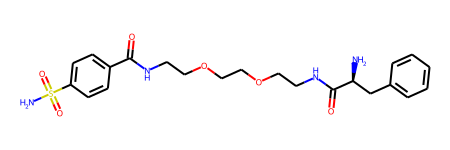

In [121]:
one_mol_object = Chem.MolFromSmiles(one_smile_string,sanitize=True)
one_mol_object

In [122]:
Chem.MolToSmiles(one_mol_object)

'N[C@@H](Cc1ccccc1)C(=O)NCCOCCOCCNC(=O)c1ccc(S(N)(=O)=O)cc1'

In [287]:
Chem.MolToInchiKey(one_mol_object)

[16:35:24] Invalid InChI prefix in generating InChI Key
RDKit ERROR: [16:35:24] Invalid InChI prefix in generating InChI Key


''

In [123]:
one_mol_object.GetNumAtoms()

33

In [289]:
print(Chem.MolToMolBlock(one_mol_object))


     RDKit          2D

  0  0  0  0  0  0  0  0  0  0999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 1962 2000 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C 3.750000 -14.289419 0.000000 0
M  V30 2 C 3.000000 -12.990381 0.000000 0
M  V30 3 C 1.500000 -12.990381 0.000000 0
M  V30 4 C 0.597245 -14.188310 0.000000 0
M  V30 5 C 0.750000 -11.691343 0.000000 0
M  V30 6 N 1.500000 -10.392305 0.000000 0
M  V30 7 C 0.750000 -9.093267 0.000000 0
M  V30 8 O -0.574345 -8.388917 0.000000 0
M  V30 9 C 1.500000 -7.794229 0.000000 0
M  V30 10 N 0.750000 -6.495191 0.000000 0
M  V30 11 C 1.500000 -5.196152 0.000000 0
M  V30 12 O 2.955424 -4.833191 0.000000 0
M  V30 13 C 0.750000 -3.897114 0.000000 0
M  V30 14 C 1.500000 -2.598076 0.000000 0
M  V30 15 C 0.750000 -1.299038 0.000000 0
M  V30 16 C 1.500000 0.000000 0.000000 0
M  V30 17 C 0.750000 1.299038 0.000000 0
M  V30 18 C -0.750000 1.299038 0.000000 0
M  V30 19 C -1.500000 0.000000 0.000000 0
M  V30 20 C -0.750000 -1.299038 0.000000 0
M  V30 21 N -0.750000 -3.897114 

In [ ]:
from rdkit.Chem import AllChem
one_mol_object_3D = Chem.AddHs(one_mol_object)
AllChem.EmbedMolecule(one_mol_object_3D)
one_mol_object_3D

In [29]:
print(Chem.MolToMolBlock(one_mol_object_3D))


     RDKit          3D

 63 64  0  0  0  0  0  0  0  0999 V2000
  -10.5760    0.5772    0.6511 S   0  0  0  0  0  6  0  0  0  0  0  0
  -10.8749    2.0047    0.2602 O   0  0  0  0  0  0  0  0  0  0  0  0
  -11.3378   -0.3685   -0.2347 O   0  0  0  0  0  0  0  0  0  0  0  0
  -10.9644    0.3660    2.3082 N   0  0  0  0  0  0  0  0  0  0  0  0
   -8.8659    0.3289    0.4488 C   0  0  0  0  0  0  0  0  0  0  0  0
   -8.0055    1.3939    0.5629 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.6342    1.1813    0.3983 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0995   -0.0665    0.1228 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.9946   -1.1008    0.0173 C   0  0  0  0  0  0  0  0  0  0  0  0
   -8.3610   -0.9071    0.1781 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6666   -0.2215   -0.0414 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9865    0.8240   -0.1065 O   0  0  0  0  0  0  0  0  0  0  0  0
   -4.0229   -1.4475   -0.1280 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6132   -1.7336   -0

In [7]:
data_small=ligands.head(40).copy()
# data_small.info()

In [117]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(data_small,smilesCol= 'Smiles',molCol='ROMol')

PandasTools.AddMoleculeColumnToFrame(ligands,smilesCol= 'Smiles',molCol='ROMol')

# PandasTools.AddMoleculeColumnToFrame(test,smilesCol= 'SMILES',molCol='ROMol')
# test

RDKit ERROR: [01:50:26] Explicit valence for atom # 19 C, 5, is greater than permitted
[01:50:26] Explicit valence for atom # 19 C, 5, is greater than permitted
[01:50:26] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [01:50:26] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [01:50:26] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [01:50:26] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [01:50:26] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [01:50:26] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [01:50:26] Explicit valence for atom # 6 N, 4, is greater than permitted
[01:50:26] Explicit valence for atom # 5 N, 4, is greater than permitted
[01:50:26] Explicit valence for atom # 24 C, 5, is greater than permitted
[01:50:26] Explicit valence for atom # 7 N, 4, is greater than permitted
[01:50:26] Explicit valence f

RDKit ERROR: [01:50:26] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [01:50:26] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [01:50:26] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [01:50:26] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [01:50:26] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [01:50:26] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [01:50:26] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [01:50:26] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [01:50:26] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [01:50:26] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [01:50:26] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [01:50:26] Explicit valence for atom 

[01:50:26] Explicit valence for atom # 7 C, 5, is greater than permitted
[01:50:26] Explicit valence for atom # 4 C, 5, is greater than permitted
[01:50:26] Explicit valence for atom # 12 N, 4, is greater than permitted
[01:50:26] Explicit valence for atom # 13 C, 5, is greater than permitted
[01:50:26] Explicit valence for atom # 12 C, 5, is greater than permitted
[01:50:26] Explicit valence for atom # 6 N, 4, is greater than permitted
[01:50:26] Explicit valence for atom # 0 C, 5, is greater than permitted
[01:50:26] Explicit valence for atom # 1 N, 4, is greater than permitted
[01:50:26] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:50:26] Explicit valence for atom # 27 C, 5, is greater than permitted
[01:50:26] Explicit valence for atom # 20 N, 4, is greater than permitted
[01:50:26] Explicit valence for atom # 3 C, 5, is greater than permitted
[01:50:26] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:50:26] Explicit valence for atom # 6 N, 4,

In [218]:
ligands= ligands.dropna()

Smiles  \
LID                                                      
1    S(=O)(=O)(N)c1ccc(cc1)C(=O)NCCOCCOCCNC(=O)[C@@...   
2                c1cccc(c1)[C@@H](P(=O)(O)O)NCc1ccccc1   
3                                      NCCCCCCNCCCCCCN   
4                           C(=O)(O)C(=O)Nc1ccc(cc1)CN   
5     c1(ccc(cc1F)I)Nc1c(ccc(c1F)F)C(=O)NOC[C@@H](CO)O   
6                             O=C1[C@@H]2CCCN2C(=O)CN1   
7    c1(c2ccccc2)ccc(C[C@H](C[C@H](C(=O)O)C)NC(=O)C...   
8    OC(=O)CCC[C@H](O)[C@@H](/C=C/C=C/C=C/C/C=C\CCC...   
9                                    Oc1ccc(cc1)C(=O)N   
10   C[C@@H]1CCO[C@H]2Cn3cc(C(=O)NCc4ccc(F)cc4F)c(=...   
11                           c1ccc2c(c1S(O)(O)O)cccc2N   
12                       c1c(ccc(c1)c1ccc(cc1)C(=O)O)F   
13                                    CCCNC(=N)N=C(N)N   
14   S(N)(O)(O)OC[C@]12[C@H]([C@H]3[C@@H](CO1)OS(O)...   
15   Clc1c(Oc2cc(C#N)cc(c2)Cl)cc(cc1)OCC1=NN=C2N=C(...   
16   c1cccc2c(c3c(c4[C@H](C[C@@](Cc4c(c3c(c12)O)O)(...   
17                                           CCCCCCCCO   
18                         CNCCCN1c2ccccc2C=Cc2c1cccc2   
20   [C@H](C(=O)O)(Cc1ccccc1)[C@@H](C(=O)O)Cc1cc2OC...   
21   N1=C(N=C2[C@@H](C1=O)C(=CN2)CCc1ccc(cc1)C(=O)N...   
22       Clc1c(OC)c(OC)c(OC)cc1Cc1nc2c(N)ncnc2n1CCCC#C   
23                        O=C(N)N/N=C/c1ccc(o1)N(=O)=O   
24                             NCCCNc1ccc(cc1N(=O)=O)C   
25    c1cc(ccc1CN1CCCC1)N/C=C\1/c2cc(ccc2C(=O)NC1=O)Br   
26   C(=O)(c1ccc(O)cc1)N[C@@H]1CN=CCC[C@H]1OC(=O)c1...   
27   [C@@H]1(O[C@@H]2[C@H](C[C@@H](N)[C@@H]([C@H]2O...   
28                         [C@H]12CC(=O)C[C@H](CC1)N2C   
29   OC[C@H]1O[C@H]([C@@H]([C@@H]1O)N)n1cnc2c(N)ncnc12   
30                    CC(C)C1=C(C(=O)C(=C(C1=O)Br)C)Br   
31   [C@@H](Cc1ccccc1)(NC(=O)c1cc(c(c(c1)OC)OCc1ccc...   
32                 c1(c(c(c2c(c1Br)nc1n2CCN1C)Br)Br)Br   
33                              [nH]1c(=O)[nH]c(=O)cc1   
34                c1cc(ccc1C(=O)NCc1ccccc1F)S(=O)(=O)N   
35   C1C(=O)C=C2CC[C@@H]3[C@@]([C@]2(C1)C)([C@H](C[...   
36         c1ccccc1CCCN1C[C@@H]([C@H]([C@@H](C1)O)O)CO   
37   c1c2c(c(C3=NS(=O)(=O)c4cc(NS(=O)(=O)C)ccc4N3)c...   
38   c1(c(ccc(c1)I)Nc1c(c(cc(c1F)F)OC)NS(=O)(=O)C1(...   
39   N1C(=O)/C(=C\Nc2ccc(cc2)S(=O)(=O)N=C(N)N)/c2cc...   
40   C1(=N[C@@H]([C@H]([C@@H]([C@H]1O)O)O[C@@H]1[C@...   

                                                 ROMol  
LID                                                     
1    <img data-content="rdkit/molecule" src="data:i...  
2    <img data-content="rdkit/molecule" src="data:i...  
3    <img data-content="rdkit/molecule" src="data:i...  
4    <img data-content="rdkit/molecule" src="data:i...  
5    <img data-content="rdkit/molecule" src="data:i...  
6    <img data-content="rdkit/molecule" src="data:i...  
7    <img data-content="rdkit/molecule" src="data:i...  
8    <img data-content="rdkit/molecule" src="data:i...  
9    <img data-content="rdkit/molecule" src="data:i...  
10   <img data-content="rdkit/molecule" src="data:i...  
11   <img data-content="rdkit/molecule" src="data:i...  
12   <img data-content="rdkit/molecule" src="data:i...  
13   <img data-content="rdkit/molecule" src="data:i...  
14   <img data-content="rdkit/molecule" src="data:i...  
15   <img data-content="rdkit/molecule" src="data:i...  
16   <img data-content="rdkit/molecule" src="data:i...  
17   <img data-content="rdkit/molecule" src="data:i...  
18   <img data-content="rdkit/molecule" src="data:i...  
20   <img data-content="rdkit/molecule" src="data:i...  
21   <img data-content="rdkit/molecule" src="data:i...  
22   <img data-content="rdkit/molecule" src="data:i...  
23   <img data-content="rdkit/molecule" src="data:i...  
24   <img data-content="rdkit/molecule" src="data:i...  
25   <img data-content="rdkit/molecule" src="data:i...  
26   <img data-content="rdkit/molecule" src="data:i...  
27   <img data-content="rdkit/molecule" src="data:i...  
28   <img data-content="rdkit/molecule" src="data:i...  
29   <img data-c
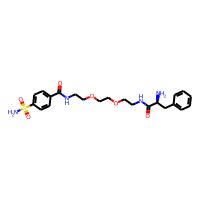
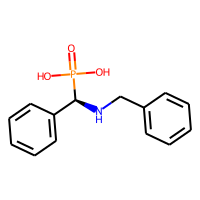
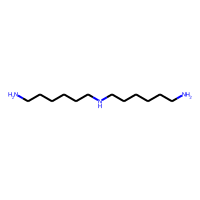
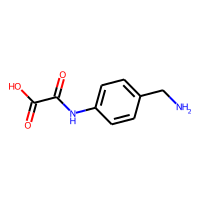
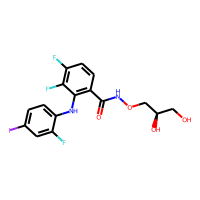
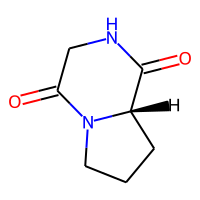
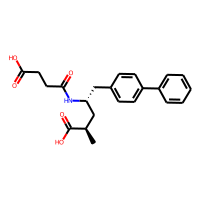
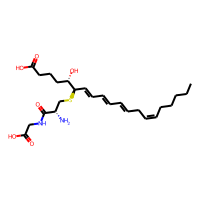
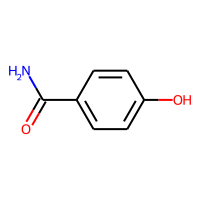
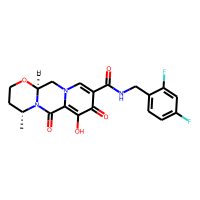
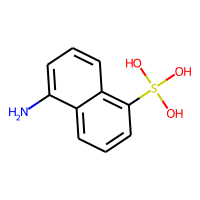
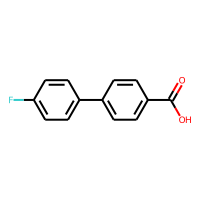
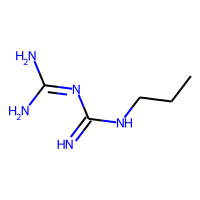
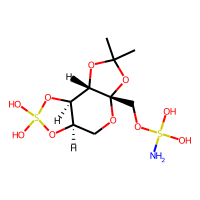
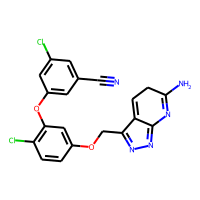
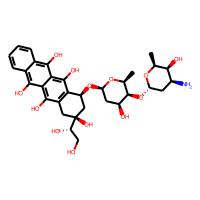
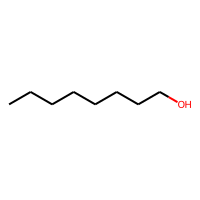
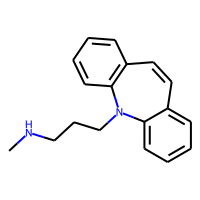
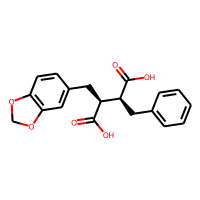
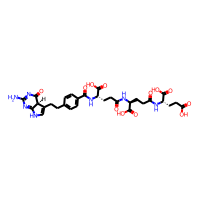
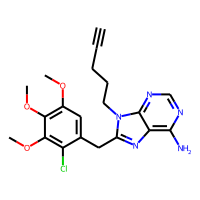
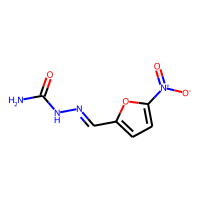
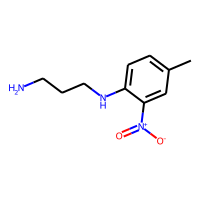
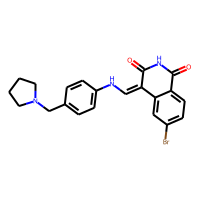
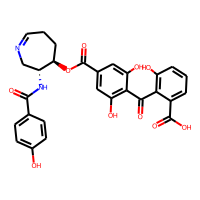
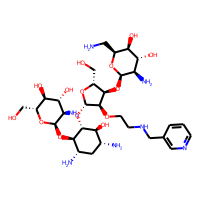
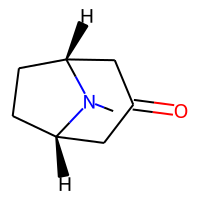
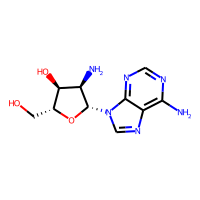
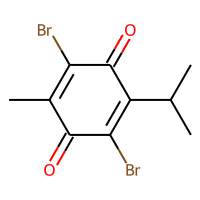
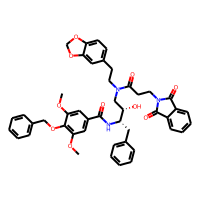
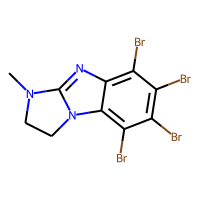
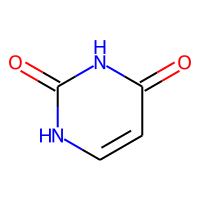
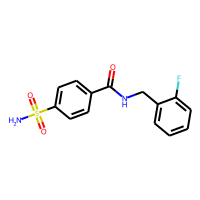
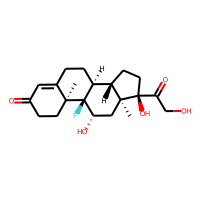
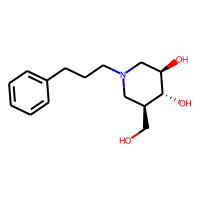
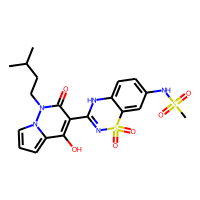
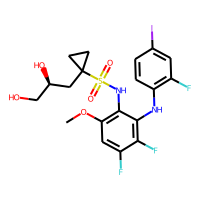
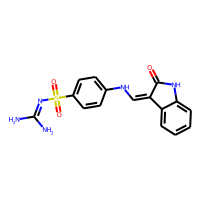
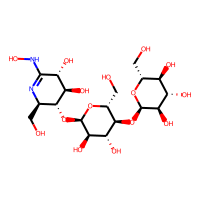

In [9]:
data_small = data_small.dropna()
data_small

In [74]:
ligands['Smiles'][1]

'S(=O)(=O)(N)c1ccc(cc1)C(=O)NCCOCCOCCNC(=O)[C@@H](N)Cc1ccccc1'

In [220]:
ligands[ligands['ROMol'].isnull()].count()

Smiles    0
ROMol     0
dtype: int64

Smiles  \
LID                                                      
1    S(=O)(=O)(N)c1ccc(cc1)C(=O)NCCOCCOCCNC(=O)[C@@...   
2                c1cccc(c1)[C@@H](P(=O)(O)O)NCc1ccccc1   
3                                      NCCCCCCNCCCCCCN   
4                           C(=O)(O)C(=O)Nc1ccc(cc1)CN   
5     c1(ccc(cc1F)I)Nc1c(ccc(c1F)F)C(=O)NOC[C@@H](CO)O   

                                                 ROMol  \
LID                                                      
1    <img data-content="rdkit/molecule" src="data:i...   
2    <img data-content="rdkit/molecule" src="data:i...   
3    <img data-content="rdkit/molecule" src="data:i...   
4    <img data-content="rdkit/molecule" src="data:i...   
5    <img data-content="rdkit/molecule" src="data:i...   

                                                MolObj  n_Atoms  \
LID                                                               
1    <img data-content="rdkit/molecule" src="data:i...       33   
2    <img data-content="rdkit/molecule" src="data:i...       19   
3    <img data-content="rdkit/molecule" src="data:i...       15   
4    <img data-content="rdkit/molecule" src="data:i...       14   
5    <img data-content="rdkit/molecule" src="data:i...       26   

                                           Fingerprint  
LID                                                     
1    0111111011111111110111101111111110011011111111...  
2    0110110101100001111001101001111010101111110101...  
3    0001000000000000000000000001000000001000000000...  
4    0110000001110101110000100110100000101101110010...  
5    1111101111101110111111110100101111111100110011...
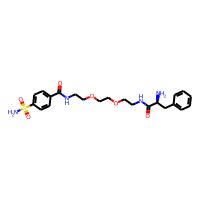
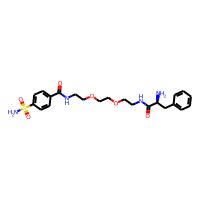
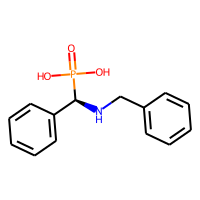
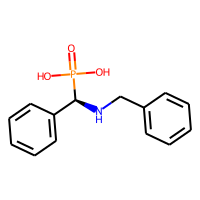
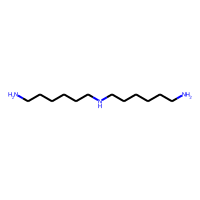
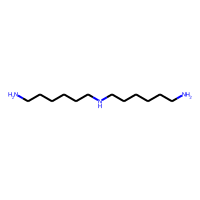
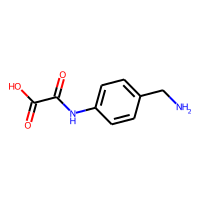
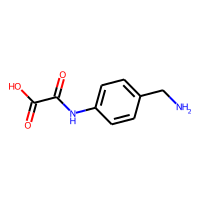
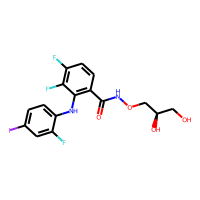
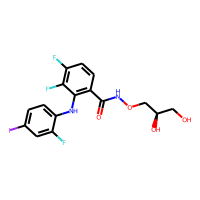

In [221]:
data_small["MolObj"]=data_small['Smiles'].map(lambda x: Chem.MolFromSmiles(x))
data_small.head()


/var/folders/4_/d00l0kjx0d98bkwv29wwqzlm0000gn/T/ipykernel_75148/2086277798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligands["MolObj"]=ligands['Smiles'].map(lambda x: Chem.MolFromSmiles(x))


Smiles  \
LID                                                      
1    S(=O)(=O)(N)c1ccc(cc1)C(=O)NCCOCCOCCNC(=O)[C@@...   
2                c1cccc(c1)[C@@H](P(=O)(O)O)NCc1ccccc1   
3                                      NCCCCCCNCCCCCCN   
4                           C(=O)(O)C(=O)Nc1ccc(cc1)CN   
5     c1(ccc(cc1F)I)Nc1c(ccc(c1F)F)C(=O)NOC[C@@H](CO)O   

                                                 ROMol  \
LID                                                      
1    <img data-content="rdkit/molecule" src="data:i...   
2    <img data-content="rdkit/molecule" src="data:i...   
3    <img data-content="rdkit/molecule" src="data:i...   
4    <img data-content="rdkit/molecule" src="data:i...   
5    <img data-content="rdkit/molecule" src="data:i...   

                                                MolObj  
LID                                                     
1    <img data-content="rdkit/molecule" src="data:i...  
2    <img data-content="rdkit/molecule" src="data:i...  
3    <img data-content="rdkit/molecule" src="data:i...  
4    <img data-content="rdkit/molecule" src="data:i...  
5    <img data-content="rdkit/molecule" src="data:i...
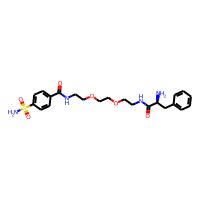
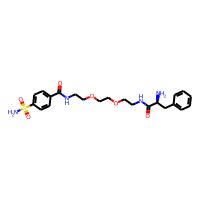
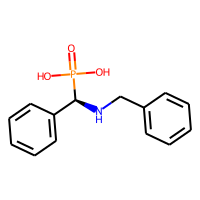
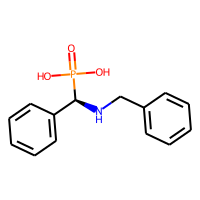
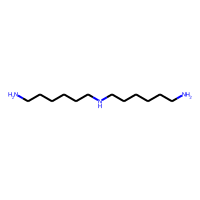
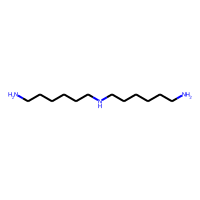
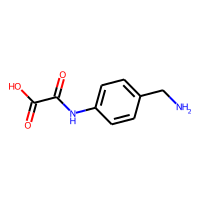
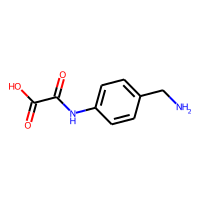
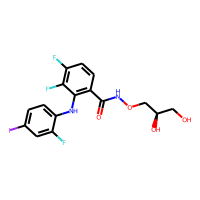
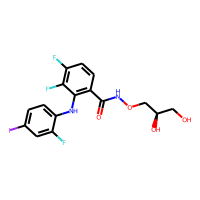

In [222]:
ligands["MolObj"]=ligands['Smiles'].map(lambda x: Chem.MolFromSmiles(x))
ligands.head()


/var/folders/4_/d00l0kjx0d98bkwv29wwqzlm0000gn/T/ipykernel_75148/1446187499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_small["n_Atoms"]=data_small['Smiles'].map(lambda x: Chem.MolFromSmiles(x).GetNumAtoms())


Smiles  \
LID                                                      
1    S(=O)(=O)(N)c1ccc(cc1)C(=O)NCCOCCOCCNC(=O)[C@@...   
2                c1cccc(c1)[C@@H](P(=O)(O)O)NCc1ccccc1   
3                                      NCCCCCCNCCCCCCN   
4                           C(=O)(O)C(=O)Nc1ccc(cc1)CN   
5     c1(ccc(cc1F)I)Nc1c(ccc(c1F)F)C(=O)NOC[C@@H](CO)O   

                                                 ROMol  \
LID                                                      
1    <img data-content="rdkit/molecule" src="data:i...   
2    <img data-content="rdkit/molecule" src="data:i...   
3    <img data-content="rdkit/molecule" src="data:i...   
4    <img data-content="rdkit/molecule" src="data:i...   
5    <img data-content="rdkit/molecule" src="data:i...   

                                                MolObj  n_Atoms  
LID                                                              
1    <img data-content="rdkit/molecule" src="data:i...       33  
2    <img data-content="rdkit/molecule" src="data:i...       19  
3    <img data-content="rdkit/molecule" src="data:i...       15  
4    <img data-content="rdkit/molecule" src="data:i...       14  
5    <img data-content="rdkit/molecule" src="data:i...       26
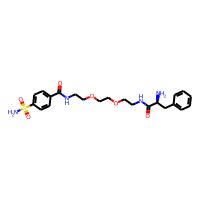
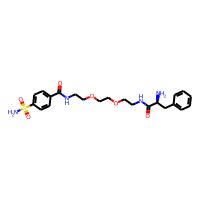
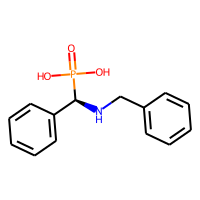
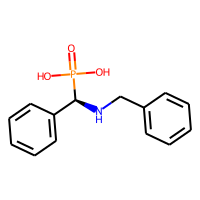
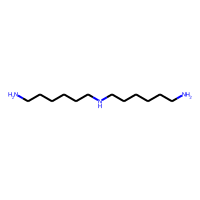
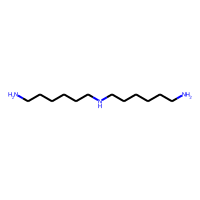
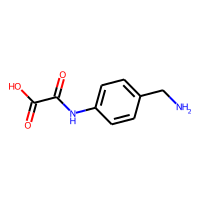
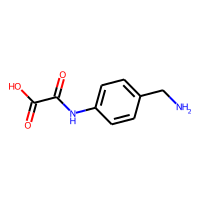
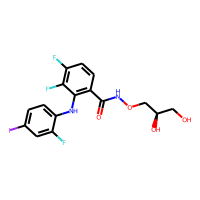
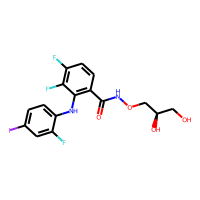

In [194]:
data_small["n_Atoms"]=data_small['Smiles'].map(lambda x: Chem.MolFromSmiles(x).GetNumAtoms())
data_small.head()

In [226]:
ligands["n_Atoms"]=ligands['Smiles'].map(lambda x: Chem.MolFromSmiles(x).GetNumAtoms())
ligands.isnull().count()

/var/folders/4_/d00l0kjx0d98bkwv29wwqzlm0000gn/T/ipykernel_75148/3184949446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligands["n_Atoms"]=ligands['Smiles'].map(lambda x: Chem.MolFromSmiles(x).GetNumAtoms())


Smiles     3242
ROMol      3242
MolObj     3242
n_Atoms    3242
dtype: int64

## Drawing a Mol Grid

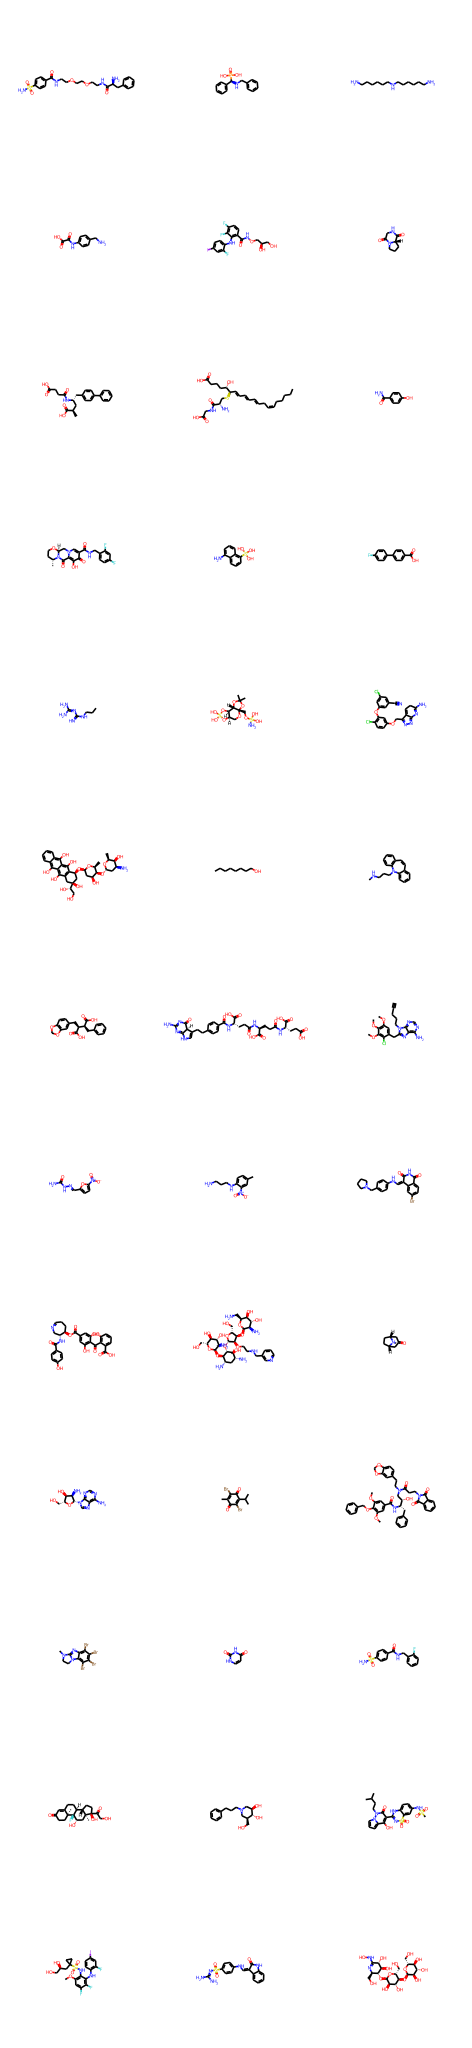

In [195]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(list(data_small.ROMol),useSVG=True)

## Molecular Fingerprints

Smiles are string representations of the molecule, and we've seen how to convert these strings to actual molecular images / visual representations. But it may not be the best way to represent the molecule in a neural net, since it doesn't take into account other molecular factors, such as 'near neighbor interactions', among other factors.
So we need a more complex way of represention, such as Fingerprints, eg. RDKit Fingerprints...etc.



In [196]:
# data_small.head()
# data_small.info()
data_small = data_small.dropna()


In [197]:
mol_object=data_small['ROMol'][1]
mol_object_B=data_small['ROMol'][2]

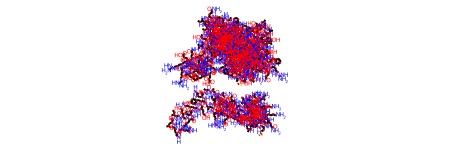

In [44]:
# mol_object=test['ROMol'][0]
# mol_object_protein

In [45]:
mol_fp = Chem.RDKFingerprint(mol_object,maxPath=7,fpSize=512)
mol_fp_B = Chem.RDKFingerprint(mol_object_B,maxPath=7,fpSize=512)

# mol_fp_protein = Chem.RDKFingerprint(mol_object_protein,maxPath=7,fpSize=512)

In [199]:
mol_fp

In [50]:
mol_fp.ToBitString()
# mol_fp_B.ToBitString()
# mol_fp_protein.ToBitString()

512

In [217]:
data_small["Fingerprint"].iloc[0]

str

In [201]:
import numpy as np
np.array(mol_fp)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [65]:
DataStructs.DiceSimilarity(mol_fp,mol_fp_B) 

0.6676646706586826

In [227]:
data_small["Fingerprint"]=data_small['ROMol'].map(lambda x: np.array((Chem.RDKFingerprint(x,maxPath=7,fpSize=512)).ToBitString()))


In [228]:
ligands["Fingerprint"]=ligands['ROMol'].map(lambda x: np.array((Chem.RDKFingerprint(x,maxPath=7,fpSize=512)).ToBitString()))


/var/folders/4_/d00l0kjx0d98bkwv29wwqzlm0000gn/T/ipykernel_75148/2567027253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligands["Fingerprint"]=ligands['ROMol'].map(lambda x: np.array((Chem.RDKFingerprint(x,maxPath=7,fpSize=512)).ToBitString()))


Smiles  \
LID                                                       
1     S(=O)(=O)(N)c1ccc(cc1)C(=O)NCCOCCOCCNC(=O)[C@@...   
2                 c1cccc(c1)[C@@H](P(=O)(O)O)NCc1ccccc1   
3                                       NCCCCCCNCCCCCCN   
4                            C(=O)(O)C(=O)Nc1ccc(cc1)CN   
5      c1(ccc(cc1F)I)Nc1c(ccc(c1F)F)C(=O)NOC[C@@H](CO)O   
...                                                 ...   
3427           N1=C2[C@H](N(C1)CCNC(CO)CO)C(=O)N=C(N)N2   
3428        C1(=NC2=NC=N[C@H]2C(=N1)OC[C@H]1CCC(=O)N1)N   
3429  O=C1C/C=C/[C@H](O)CC(=O)O[C@H]([C@@H]([C@H](C/...   
3430  c1cc(ccc1C[C@@H](C(=O)N[C@H]1CCCCN(C1=O)Cc1ccc...   
3431      n1(cnc2c(=O)nc(N)[nH]c12)CCCCC(F)(F)P(=O)(O)O   

                                                  ROMol  \
LID                                                       
1     <img data-content="rdkit/molecule" src="data:i...   
2     <img data-content="rdkit/molecule" src="data:i...   
3     <img data-content="rdkit/molecule" src="data:i...   
4     <img data-content="rdkit/molecule" src="data:i...   
5     <img data-content="rdkit/molecule" src="data:i...   
...                                                 ...   
3427  <img data-content="rdkit/molecule" src="data:i...   
3428  <img data-content="rdkit/molecule" src="data:i...   
3429  <img data-content="rdkit/molecule" src="data:i...   
3430  <img data-content="rdkit/molecule" src="data:i...   
3431  <img data-content="rdkit/molecule" src="data:i...   

                                                 MolObj  n_Atoms  \
LID                                                                
1     <img data-content="rdkit/molecule" src="data:i...       33   
2     <img data-content="rdkit/molecule" src="data:i...       19   
3     <img data-content="rdkit/molecule" src="data:i...       15   
4     <img data-content="rdkit/molecule" src="data:i...       14   
5     <img data-content="rdkit/molecule" src="data:i...       26   
...                                                 ...      ...   
3427  <img data-content="rdkit/molecule" src="data:i...       19   
3428  <img data-content="rdkit/molecule" src="data:i...       18   
3429  <img data-content="rdkit/molecule" src="data:i...       50   
3430  <img data-content="rdkit/molecule" src="data:i...       41   
3431  <img data-content="rdkit/molecule" src="data:i...       22   

                                            Fingerprint  
LID                                                      
1     0111111011111111110111101111111110011011111111...  
2     0110110101100001111001101001111010101111110101...  
3     0001000000000000000000000001000000001000000000...  
4     0110000001110101110000100110100000101101110010...  
5     1111101111101110111111110100101111111100110011...  
...                                                 ...  
3427  1110111111111111110011011101111111111111111111...  
3428  1111111111110111101101011111011111111110101111...  
3429  1111111111111111111111111111111011111111111111...  
3430  0111111111111011111011111111101001011111111111...  
3431  1111111110111101111110111111011111101110110111...  

[3242 rows x 5 columns]
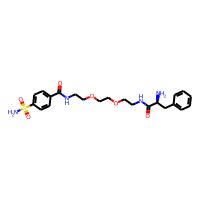
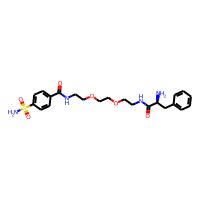
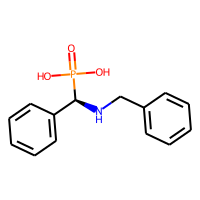
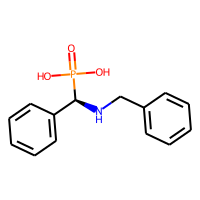
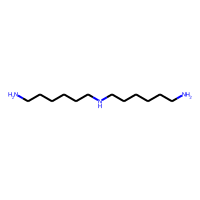
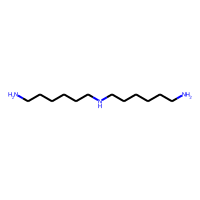
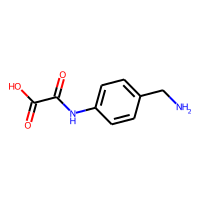
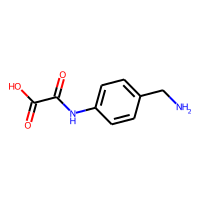
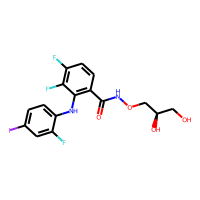
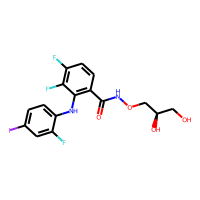
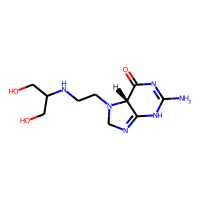
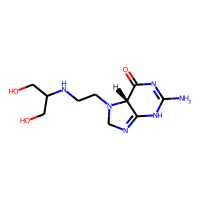
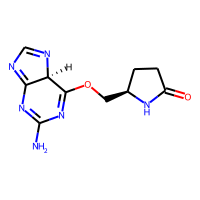
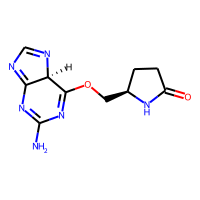
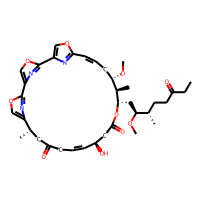
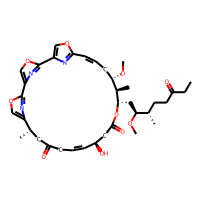
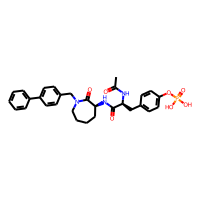
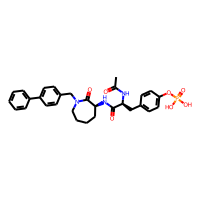
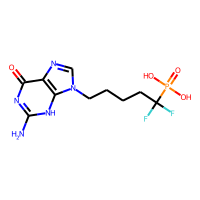
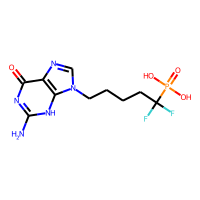

In [229]:
ligands

## PySmiles and NetworkX for Graph Representation of Smile

In [78]:
from pysmiles import read_smiles
import networkx as nx
    
smiles = 'S(=O)(=O)(N)c1ccc(cc1)C(=O)NCCOCCOCCNC(=O)[C@@H](N)Cc1ccccc1'
mol = read_smiles(smiles)
    
# atom vector (C only)
print(mol.nodes(data='element'))
# adjacency matrix
print(nx.to_numpy_matrix(mol))

Atom "[C@@H]" contains stereochemical information that will be discarded.


[(0, 'S'), (1, 'O'), (2, 'O'), (3, 'N'), (4, 'C'), (5, 'C'), (6, 'C'), (7, 'C'), (8, 'C'), (9, 'C'), (10, 'C'), (11, 'O'), (12, 'N'), (13, 'C'), (14, 'C'), (15, 'O'), (16, 'C'), (17, 'C'), (18, 'O'), (19, 'C'), (20, 'C'), (21, 'N'), (22, 'C'), (23, 'O'), (24, 'C'), (25, 'N'), (26, 'C'), (27, 'C'), (28, 'C'), (29, 'C'), (30, 'C'), (31, 'C'), (32, 'C')]
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [72]:
mol.nodes(data='element')[9]

'N'

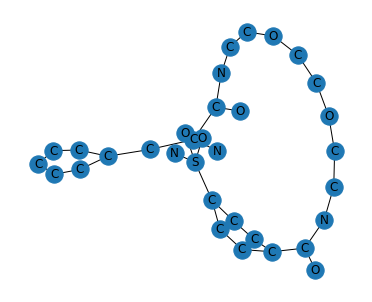

In [76]:
import matplotlib.pyplot as plt
elements = nx.get_node_attributes(mol, name = "element")
nx.draw(mol, with_labels=True, labels = elements, pos=nx.spring_layout(mol))
plt.gca().set_aspect('equal')


## BioPython

In [52]:
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB import *
from Bio import motifs
from Bio.Seq import Seq

In [53]:
parser = PDBParser(PERMISSIVE=1)

In [55]:
structure_id = "test"
filename = "1BKY.pdb"
structure = parser.get_structure(structure_id, filename)

/opt/homebrew/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Invalid or missing occupancy at line 1.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Invalid or missing B factor at line 1.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/opt/homebrew/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Invalid or missing occupancy at line 2.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/Bio/P

/opt/homebrew/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Invalid or missing occupancy at line 1859.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Invalid or missing B factor at line 1859.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Invalid or missing occupancy at line 1860.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Invalid or missing B factor at line 1860.
Exception ignored.
Some atoms or residues may be missing in the dat

In [16]:
from Bio.PDB import parse_pdb_header
with open(filename, "r") as handle:
    header_dict = parse_pdb_header(handle)

In [58]:
from Bio.PDB import *
pdb = PDBList()
pdb.retrieve_pdb_file("2FAT",pdir=".", file_format="pdb")
parser = PDBParser(PERMISSIVE=True,QUIET=True)
data = parser.get_structure("2FAT","pdb2FAT.ent")
print(data.header.keys())
print(data.header["deposition_date"])
print(data.header["release_date"])

model = data.get_models()
models = list(model)
print(models)

chain = models[0].get_chains()
chains = list(chain)
# chains = list[models[0].get_chains()]
print(chains)

residue = chains[0].get_residues()
residues = list(residue)
print(residues)

atom = residues[1].get_atoms()
atoms = list(atom)
print(atom)

Structure exists: './pdb2fat.ent' 
dict_keys(['name', 'head', 'idcode', 'deposition_date', 'release_date', 'structure_method', 'resolution', 'structure_reference', 'journal_reference', 'author', 'compound', 'source', 'has_missing_residues', 'missing_residues', 'keywords', 'journal'])
2005-12-07
2006-11-14
[<Model id=0>]
[<Chain id=L>, <Chain id=H>]
[<Residue ASP het=  resseq=1 icode= >, <Residue ILE het=  resseq=2 icode= >, <Residue VAL het=  resseq=3 icode= >, <Residue LEU het=  resseq=4 icode= >, <Residue THR het=  resseq=5 icode= >, <Residue GLN het=  resseq=6 icode= >, <Residue SER het=  resseq=7 icode= >, <Residue PRO het=  resseq=8 icode= >, <Residue ASP het=  resseq=9 icode= >, <Residue ILE het=  resseq=10 icode= >, <Residue THR het=  resseq=11 icode= >, <Residue ALA het=  resseq=12 icode= >, <Residue ALA het=  resseq=13 icode= >, <Residue SER het=  resseq=14 icode= >, <Residue LEU het=  resseq=15 icode= >, <Residue GLY het=  resseq=16 icode= >, <Residue GLN het=  resseq=17 icod